# **Project Name**    - Netflix Movies and TV Shows Clustering

##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual

# **Project Summary**

In this project, Netflix movies and TV series will be grouped according to their features using unsupervised machine learning approaches. The dataset will include details on different Netflix titles, including title, genre, rating, year of release, and possibly other descriptive characteristics. In order to comprehend the dataset's structure and find any missing or inconsistent values, the project will start by examining it. To deal with missing data, data wrangling methods like imputation and the elimination of partial items will be used. Pre-processing techniques like one-hot encoding will be used to transform categorical data like genre and rating into numerical representations that machine learning algorithms can use. Tokenization, stemming, and TF-IDF vectorization are some of the pre-processing methods that will be used to extract relevant characteristics from text data, such as titles or descriptions. To make sure that every feature contributes equally to the clustering process, data manipulation will entail feature scaling or normalization. Despite being an unsupervised learning study, hypotheses regarding possible groups within the data will be developed by exploratory data analysis. For example, the research will look into whether release year connects with particular clusters or whether genres prefer to cluster together. The interpretation of the clustering results will be guided by these theories. To investigate possible connections between features and observed clusters, statistical procedures like chi-square tests will be employed. Clustering techniques like KNN will be tested during the research. To find trends and insights on the connections between various Netflix titles, the generated clusters will be examined and visualized. By examining possible ramifications for content suggestion or market analysis, the project will seek to offer a meaningful interpretation of the clusters found.

# **Problem Statement**


The task is to create a model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Import wordcloud library forcreating word clouds
from wordcloud import WordCloud, STOPWORDS

# Import libraries for text data prerocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import Warnings library
from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

There are 7787 rows and 12 columns in the dataset.

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are 11 object type variables and 1 integer type variable.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

The columns "director", "cast", "country", "date_added", and "rating" have missing values.

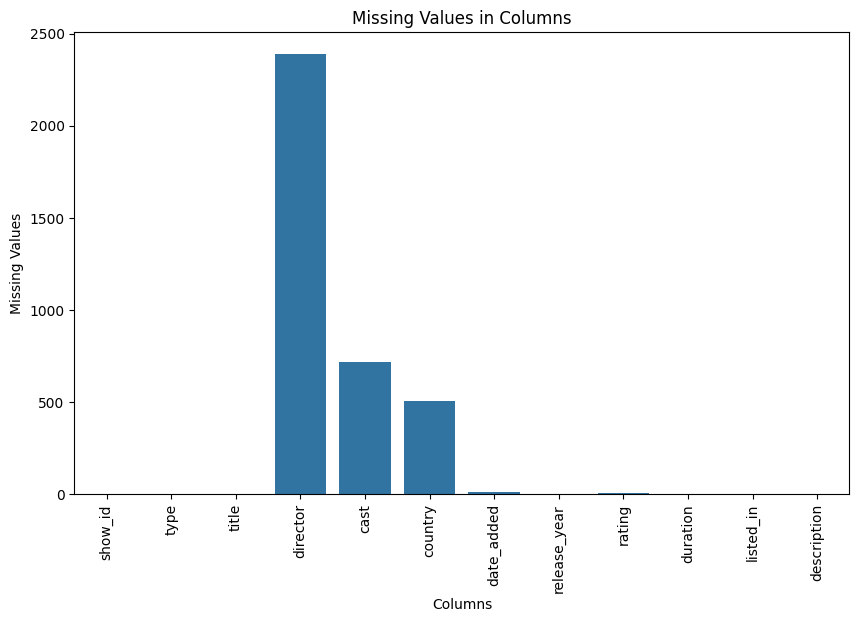

In [ ]:
# Visualizing the missing values
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Columns')
plt.show()

This dataset includes Netflix movies and TV series as of 2019. There are 12 variables out of which 11 variables are object type and 1 is integer type. The variable "date_added" is needed to be converted in datetime format. There are no duplicate values present in the dataset. The variables "director", "cast", "country", "date_added", and "rating" contain null values which are needed to be handled before modelling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
# Select only non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number'])

# Create a table to describe the non-numeric columns
description_table = pd.DataFrame({
    'Data Type': non_numeric_cols.dtypes,
    'Number of Unique Values': non_numeric_cols.nunique(),
    'Sample Values': [list(non_numeric_cols[col].unique()[:5]) for col in non_numeric_cols.columns]
})

description_table

Data Type  Number of Unique Values  \
show_id        object                     7787   
type           object                        2   
title          object                     7787   
director       object                     4049   
cast           object                     6831   
country        object                      681   
date_added     object                     1565   
rating         object                       14   
duration       object                      216   
listed_in      object                      492   
description    object                     7769   

                                                 Sample Values  
show_id                                   [s1, s2, s3, s4, s5]  
type                                          [TV Show, Movie]  
title                                 [3%, 7:19, 23:59, 9, 21]  
director     [nan, Jorge Michel Grau, Gilbert Chan, Shane A...  
cast         [João Miguel, Bianca Comparato, Michel Gomes, ...  
country      [Brazil, Mexico, Singapore, United States, Tur...  
date_added   [August 14, 2020, December 23, 2016, December ...  
rating                         [TV-MA, R, PG-13, TV-14, TV-PG]  
duration          [4 Seasons, 93 min, 78 min, 80 min, 123 min]  
listed_in    [International TV Shows, TV Dramas, TV Sci-Fi ...  
description  [In a future where the elite inhabit an island...

### Variables Description

As of now, there is only one numeric column that is "release_year". The mean release date is 2013.932580 and standard deviation is 8.757395. There are 11 non-numeric (object type) variables out of which 5 variables contain missing values. The column "date_added" is needed to be converted into datetime format.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
unique_counts = pd.DataFrame({'Column Name': data.columns,
                             'Number of Unique Values': [data[col].nunique() for col in data.columns]})

unique_counts

Column Name  Number of Unique Values
0        show_id                     7787
1           type                        2
2          title                     7787
3       director                     4049
4           cast                     6831
5        country                      681
6     date_added                     1565
7   release_year                       73
8         rating                       14
9       duration                      216
10     listed_in                      492
11   description                     7769

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Define a function to convert month names to month numbers
def convert_month_to_number(month_name):
    month_name = month_name.lower()
    if month_name == 'january':
        return 1
    elif month_name == 'february':
        return 2
    elif month_name == 'march':
        return 3
    elif month_name == 'april':
        return 4
    elif month_name == 'may':
        return 5
    elif month_name == 'june':
        return 6
    elif month_name == 'july':
        return 7
    elif month_name == 'august':
        return 8
    elif month_name == 'september':
        return 9
    elif month_name == 'october':
        return 10
    elif month_name == 'november':
        return 11
    elif month_name == 'december':
        return 12
    else:
        return None

# Convert the 'date_added' column to datetime format
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

In [ ]:
# Remove unnecessary columns
data = data.drop(['show_id'], axis=1)

# Handling Missing Values
# Fill missing values in director, cast, country with "Unknown"
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

# Fill missing values in  with the mode
data['rating'].fillna(data['rating'].mode()[0], inplace=True)

In [ ]:
# Extract year from date_added
data['added_year'] = data['date_added'].dt.year

# Create a new column for content duration type
data['duration_type'] = data['duration'].str.split(' ').str[-1]
data['duration_int'] = data['duration'].str.split(' ').str[0]
data['duration_int'] = pd.to_numeric(data['duration_int'], errors='coerce')

# Handle the missing values in duration_int
data['duration_int'].fillna(data['duration_int'].median(), inplace=True)

# Convert duration_int to integer
data['duration_int'] = data['duration_int'].astype(int)

# Removing rows with missing values in rating
data.dropna(subset=['rating'], inplace=True)

In [ ]:
# Fill missing values in "date_added" with median
data['date_added'].fillna(data['added_year'].median(), inplace=True)

# Fill missing values in "added_year" with median
data['added_year'].fillna(data['added_year'].median(), inplace=True)

In [ ]:
# Now, let's check the missing values again
print(data.isnull().sum())

type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
added_year       0
duration_type    0
duration_int     0
dtype: int64


In [ ]:
data["type"].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [ ]:
# Printing the shapes for each type of content
print(f"Shape of movies: {data[data['type'] == 'Movie'].shape}")
print(f"Shape of TV shows: {data[data['type'] == 'TV Show'].shape}")

Shape of movies: (5377, 14)
Shape of TV shows: (2410, 14)


Firstly, I converted 'date_added' column into datetime format. Then, I dropped the column 'show_id'. I created a column 'added_year' where I extracted the years from the column 'date_added'. To handle the missing values, I converted the missing values in the columns 'director', 'cast', and 'country' with unknown. I replaced missing values in column 'rating' with the mode value. I created a column 'duration_int', handled missing values in it, converted its type to integer. I replaced the missing values in the columns 'date_added' and 'added_year' with median.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

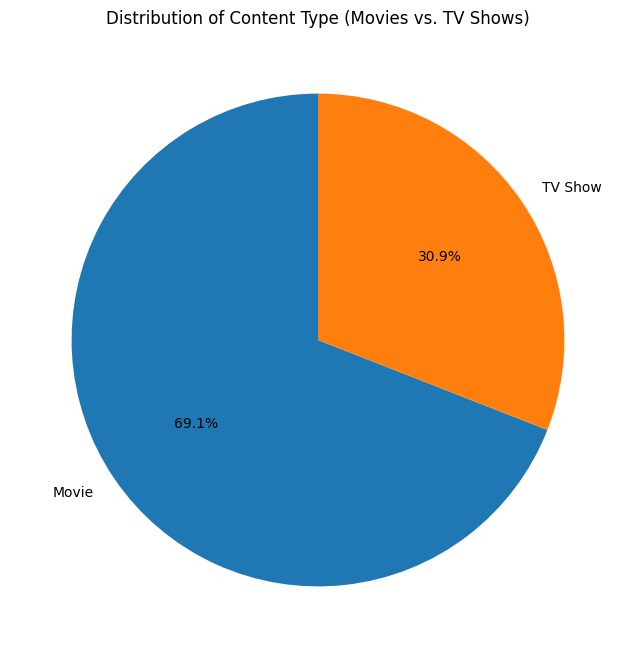

In [ ]:
# Chart - 1 visualization code

# Distribution of Content Type
plt.figure(figsize=(8, 8))
content_type_counts = data['type'].value_counts()
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Type (Movies vs. TV Shows)')
plt.show()

##### 1. Why did you pick the specific chart?

The proportions of several categories as components of a whole are graphically represented in a pie chart. Since "type" is a category column, the pie chart makes it simple to observe which type predominates.

##### 2. What is/are the insight(s) found from the chart?

Netflix contain 30.9% tv shows and 69.1% movies. There are more number of movies on Netflix compared to tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A greater proportion of films (69.1%) draw casual viewers seeking short-term amusement. TV series (30.9%) appeal to binge-watchers and maintain user engagement over time. This combination strikes a compromise between long-term subscriber retention (TV series) and short-term engagement (movies).
But there is also a negative impact. TV shows keep viewers interested for months, but movies are one-time experiences. There is less binge-worthy content when there are fewer TV series, which raises the churn rate (people terminating subscriptions).

#### Chart - 2

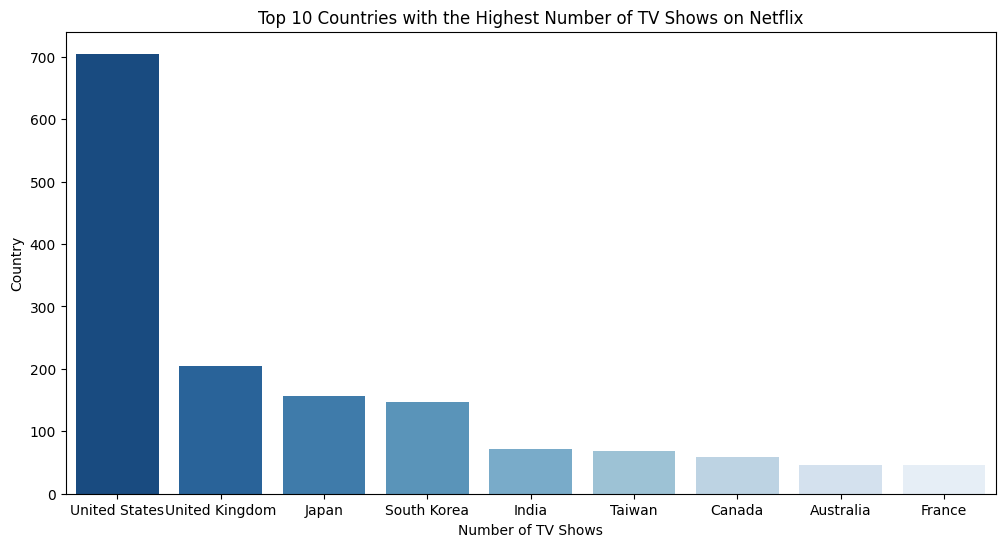

In [ ]:
# Chart - 2 visualization code

# Filter only TV Shows
tv_shows = data[data["type"] == "TV Show"]

# Count TV Shows per country and get the top 10
top_countries = tv_shows["country"].value_counts().nlargest(10)

# Drop unknown countries from top_countries
top_countries = top_countries[top_countries.index != 'Unknown']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")
plt.xlabel("Number of TV Shows")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest Number of TV Shows on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Since bars enable side-by-side comparisons of TV show counts across countries, a bar chart is the best display for the number of Netflix TV shows in the top ten nations. Trends are easier to identify because countries can be arranged from highest to lowest. Bar charts are a useful tool for displaying precise numerical differences. Clear labels and data are displayed, preventing clutter from an excessive number of categories. The countries that dominate Netflix's TV show collection are quickly highlighted in a bar chart.

##### 2. What is/are the insight(s) found from the chart?

United States streams maximum number of tv shows (nearly 700 shows) on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart, we gather that the target audience for Netflix's tv shows are citizens of United States. Netflix can collaborate with production houses to create tv shows concerning the demography of the country. Compared to United States, other countries do not stream many tv shows. To oveercome this problem and to reach out to the audience from those countries, the concerns are to be addressed. One such concern may be the unavailability of tv shows that resonates with their culture and demography.

#### Chart - 3

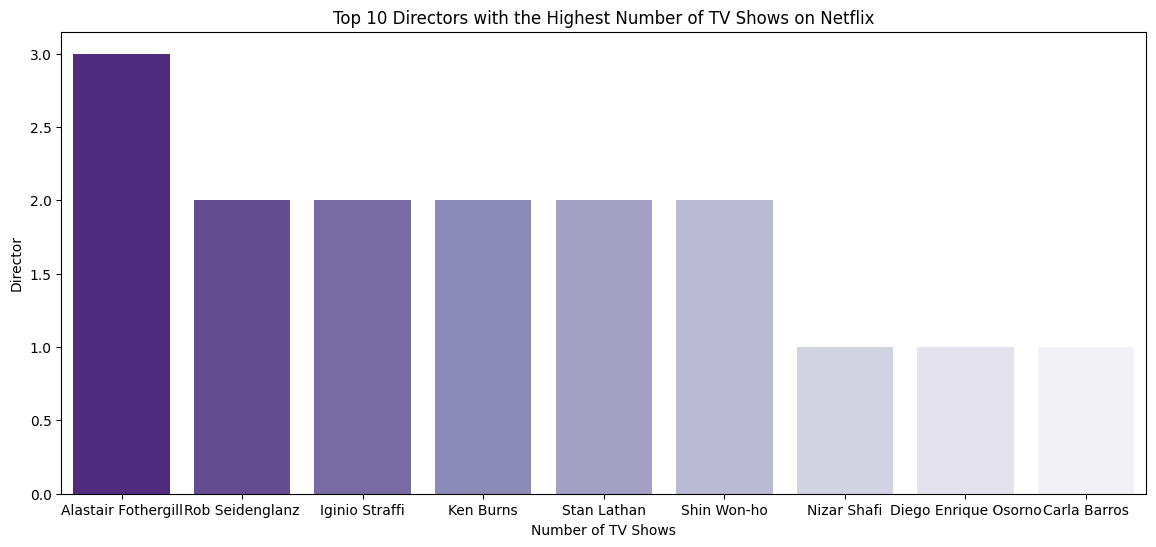

In [ ]:
# Chart - 3 visualization code

# Filter only TV Shows
tv_shows = data[data["type"] == "TV Show"]

# Count TV Shows per director and get the top 10
top_directors = tv_shows["director"].value_counts().nlargest(10)

# Drop unknown directors from top_directors
top_directors = top_directors[top_directors.index != 'Unknown']

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="Purples_r")
plt.xlabel("Number of TV Shows")
plt.ylabel("Director")
plt.title("Top 10 Directors with the Highest Number of TV Shows on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is most suitable to visualize top 10 directors with highest number of tv shows because comparing the amount of TV series per director is made easy by bar lengths. Long director names are possible, and label overlap is avoided by using horizontal bars. Finding the top directors is made simple by sorting the bars in descending order.

##### 2. What is/are the insight(s) found from the chart?

From the chart plotted above, it can be inferred that Alastair Fothergill and Rob Seidenglanz have directed most of the Netflix's tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can stream more tv shows directed by Alastair Fothergill and Rob Seidenglanz as the most of the consumers are watching tv shows directed by them.

#### Chart - 4

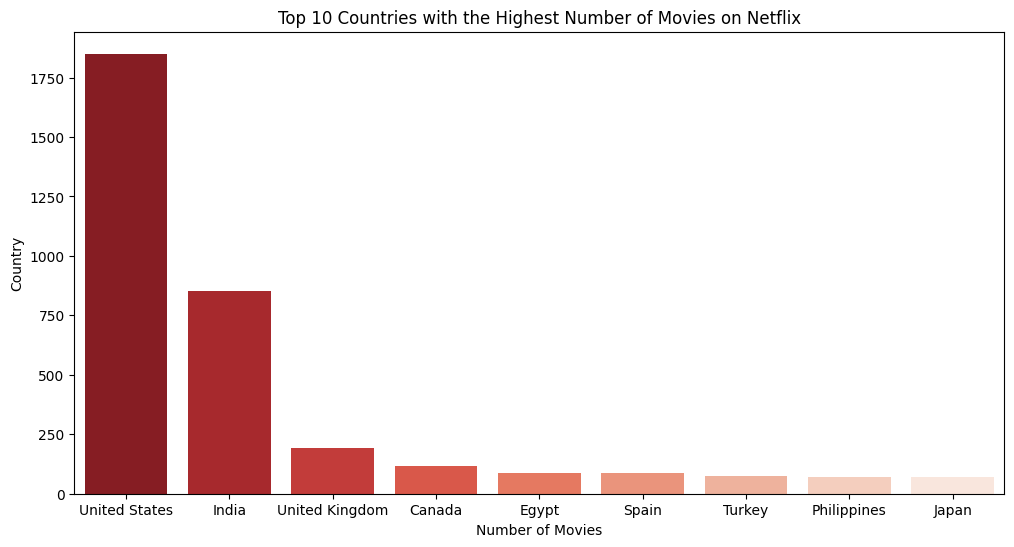

In [ ]:
# Chart - 4 visualization code

# Filter only Movies
movies = data[data["type"] == "Movie"]

# Count Movies per country and get the top 10
top_countries = movies["country"].value_counts().nlargest(10)

# Drop unknown countries from top_countries
top_countries = top_countries[top_countries.index != 'Unknown']

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Reds_r")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Highest Number of Movies on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to show how many Netflix movies are available in the top 10 countries since bars allow you to compare movie counts side by side across different countries. Since nations can be ranked from highest to lowest, trends are simpler to spot. A helpful tool for showing exact numerical differences is a bar chart. Data and labels are presented clearly, avoiding clutter from too many categories. A bar chart rapidly highlights which nations have the largest library of Netflix movies.

##### 2. What is/are the insight(s) found from the chart?

United States streams maximum number of movies (nearly 1800 movies) on Netflix, followed by India (nearly 800 movies).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer from the data that the citizens of United States and India are the intended viewership for Netflix's movie streams. Netflix can work with production companies to develop movies that are relevant to these nations' demographics. Other nations do not stream as many television programs as these two. Concerns must be addressed in order to overcome this issue and connect with the audience in such nations. The lack of movies that speak to their culture and demographic may be one of these issues.

#### Chart - 5

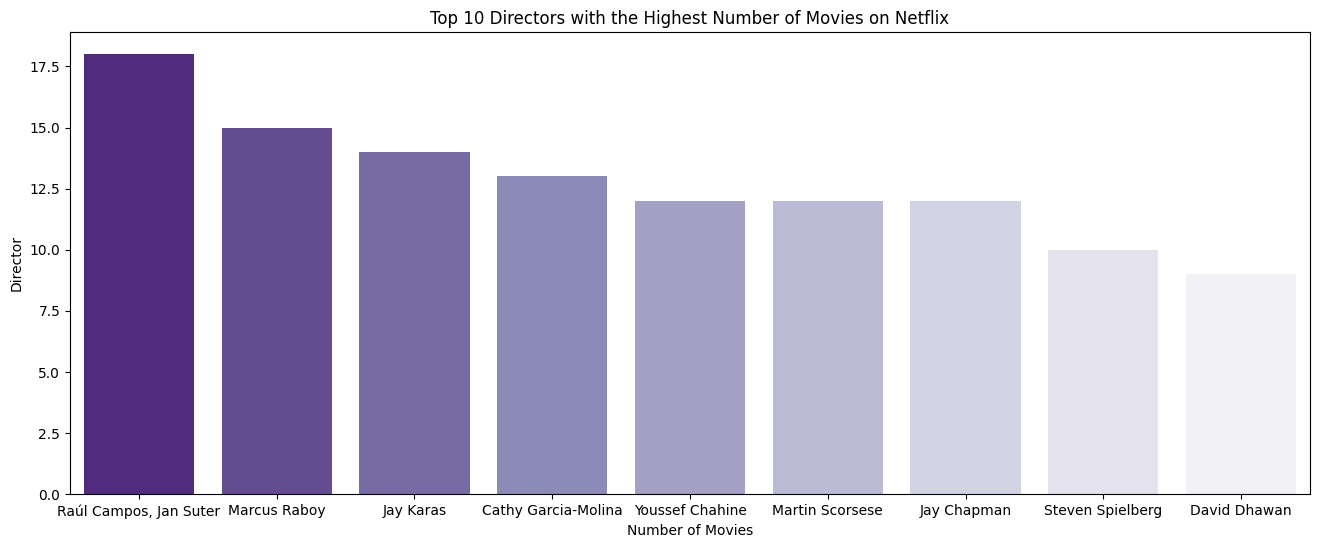

In [ ]:
# Chart - 5 visualization code

# Filter only movies
movies = data[data["type"] == "Movie"]

# Count movies per director and get the top 10
top_directors = movies["director"].value_counts().nlargest(10)

# Drop unknown directors from top_directors
top_directors = top_directors[top_directors.index != 'Unknown']

# Plot bar chart
plt.figure(figsize=(16, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette="Purples_r")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Directors with the Highest Number of Movies on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Because bar lengths make it simple to compare the number of films produced by each director, bar charts are most suited for visualizing the top ten directors with the most films. Horizontal bars prevent label overlap and allow for long director names. Sorting the bars in descending order makes it easy to find the top directors.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas have directed the maximum number of movies for Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To engage more viewers and to increase viewership, it is advisable to approach the directors with maximum number of movies (Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas). Netflix should collaborate with these directors more often as the audience is being taken by their works.

#### Chart - 6

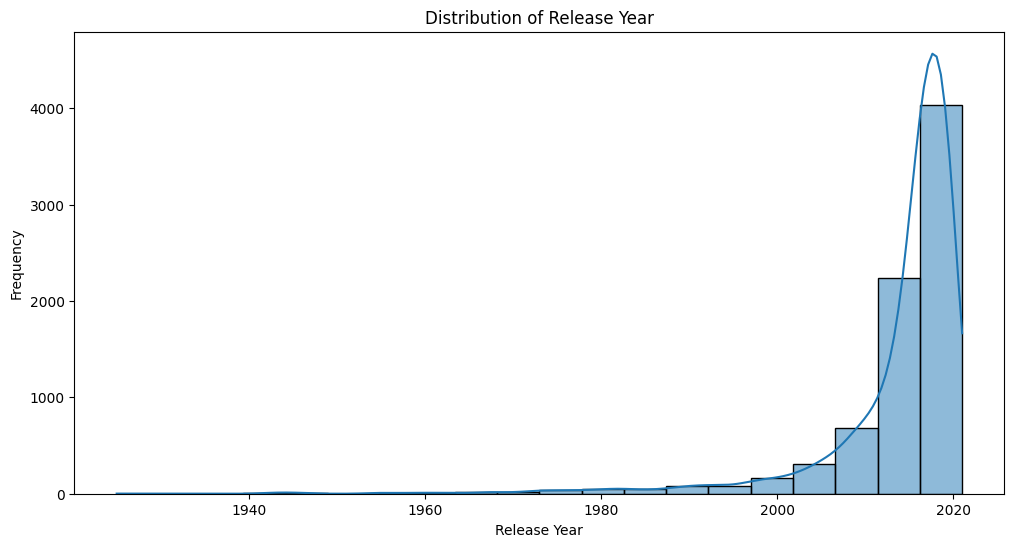

In [ ]:
# Chart - 6 visualization code

# Distribution of release year
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=20, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Year')
plt.show()

##### 1. Why did you pick the specific chart?

Since a frequency plot clearly reveals patterns over time, indicating which years had more or fewer releases, a frequency plot is the most suitable visualization for the distribution of "release year" of Netflix movies and TV shows. A frequency plot organizes values into bins or intervals, which makes trends easier to discern because release years span several decades. It shows if there are increases or decreases over time, as well as which years produced the most content. A frequency plot guarantees fluid representation for numerical data, such as years, in contrast to bar charts, which are most effective for categorical data.

##### 2. What is/are the insight(s) found from the chart?

TV shows and movies on Netflix are predominantly released in recent years, indicating a focus on newer and potentially more popular titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: This strategy keeps content fresh and relevant, appealing to a broader audience.\
Negative: A lack of older/classic content might alienate viewers who prefer such shows and movies.

#### Chart - 7

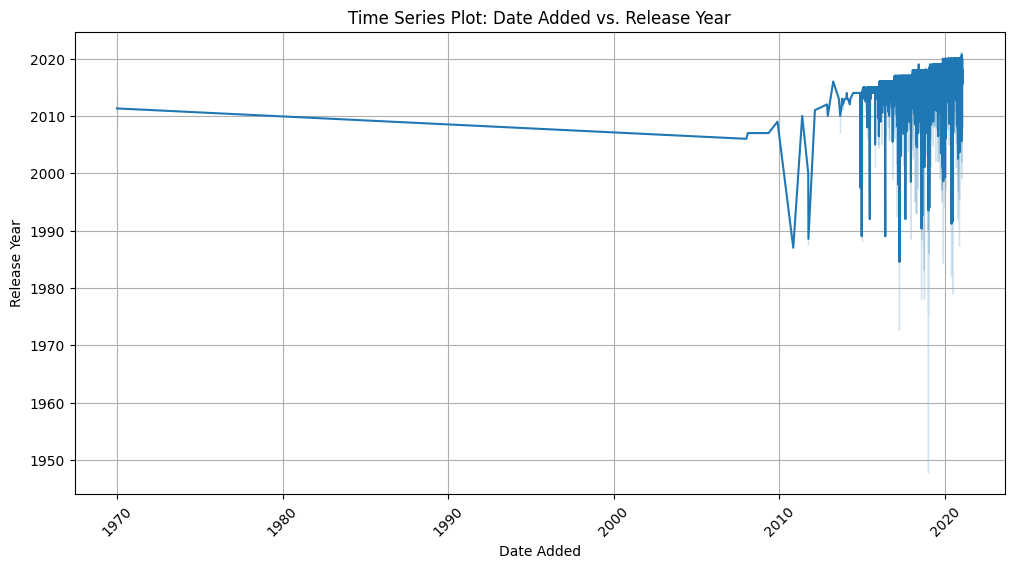

In [ ]:
# Chart - 7 visualization code

# Ensure 'date_added' is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Sort data by 'date_added'
data_sorted = data.sort_values('date_added')

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_sorted['date_added'], y=data_sorted['release_year'])

# Formatting
plt.xlabel('Date Added')
plt.ylabel('Release Year')
plt.title('Time Series Plot: Date Added vs. Release Year')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The best visualization for the release year of the content and the date it was introduced to the platform is a time series plot, which shows how Netflix's content catalog has expanded over time. It draws attention to increases or decreases in new and released content.

##### 2. What is/are the insight(s) found from the chart?

The time series plot illustrates the relationship between the release year of Netflix content and the date it was added to the platform. It essentially tracks how the age of content added to Netflix has changed over time.\
\
General Trend: The plot shows a slight upward trend, indicating that Netflix is generally adding more recently released content over time. This is likely due to a combination of factors, including licensing agreements, audience preference for newer titles, and a desire to maintain a sense of freshness.\
\
Possible Shift: There might be a slight flattening or even a slight downward trend towards the most recent dates, suggesting a possible adjustment to the strategy.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impacts:
* Relevance and Engagement:  Adding newer content keeps the platform relevant and appealing to a wider audience. It also helps maintain user engagement as they're more likely to find content they're interested in.
* Competition:  A focus on newer releases might be a strategic move to compete with other streaming platforms and stay ahead of the curve.
* Licensing:  Newer releases may be easier to license compared to older content, potentially decreasing costs and improving negotiation power.

\
Negative Impacts:
* Limited Variety: Focusing solely on newer releases might limit variety and potentially alienate older content lovers. This can impact user satisfaction and potentially lead to churn (users cancelling their subscriptions).
* Dependence on New Releases: If the strategy is too heavily based on new releases, Netflix might become overly reliant on a constant supply of fresh content, which could be challenging and costly to maintain.
* Loss of Existing Audience: If older content is neglected, it could lead to existing subscribers switching to other platforms offering older or more diverse movies and TV shows.

#### Chart - 8

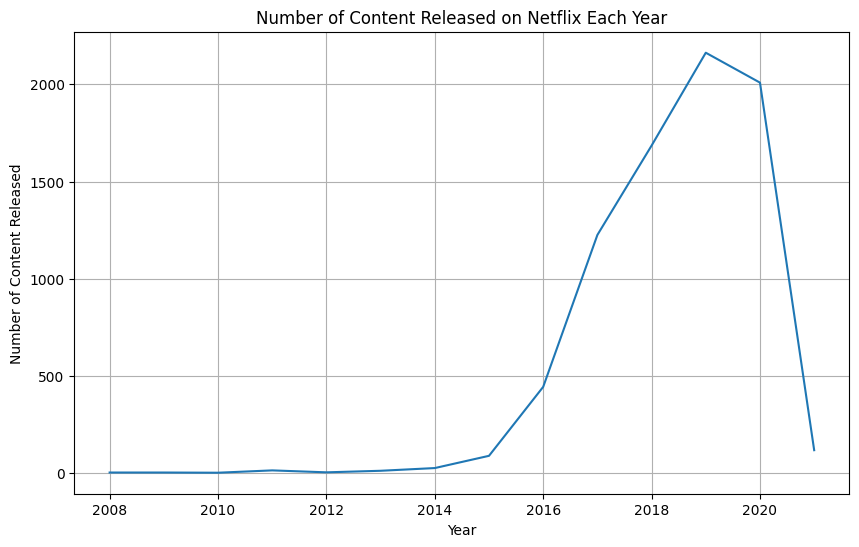

In [ ]:
# Chart - 8 visualization code

# Calculate the number of content released each year
content_per_year = data.groupby('added_year')['type'].count()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(content_per_year.index, content_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Content Released')
plt.title('Number of Content Released on Netflix Each Year')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The relationship between the content's release year and the date of its addition to Netflix is the main topic of the line chart, which shows the pattern of content addition to the platform over time. This makes it possible to examine how Netflix's approach to content has changed in relation to the age of the content they provide.

##### 2. What is/are the insight(s) found from the chart?

According to the code, the chart shows a general increasing trend, indicating that Netflix gradually adds more newly released content. This finding raises the possibility that their content strategy has changed to prioritize more recent titles. Additionally, the coding suggests a possible flattening or mild downward trend in the most recent time frame, which would point to a modification or shift in that approach.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
* Relevance and Engagement: Prioritizing newer content keeps the platform relevant to a broader audience who are likely to prefer recent releases. This can help to maintain user engagement.
* Competition:  Focusing on newer content might be a competitive strategy to differentiate Netflix from other streaming platforms.
* Licensing: Newer releases may be easier and/or cheaper to license, which impacts costs and negotiation strategies.

**Negative Impacts:**
* Limited Variety: Over-reliance on newer content might reduce the variety of available titles, potentially alienating audiences who prefer older or classic movies and shows.  This could lead to decreased user satisfaction and customer churn.
* Dependence on New Releases: The strategy's heavy reliance on new content creates a continuous need for fresh material, which can be challenging and costly to maintain.
* Loss of Existing Audience: Neglecting older content could cause existing subscribers to switch platforms if those competitors offer a more diverse library.

#### Chart - 9

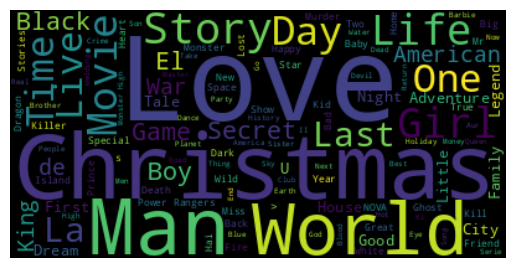

In [ ]:
# Chart - 9 visualization code

#Visualize the most common words in title
# text documents
text = " ".join(word for word in data['title'])

# Create the word cloud
wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)

# Plot the word cloud
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud visually highlights the most frequent words appearing in the titles of Netflix movies and TV shows. Words like "Love," "Life," "Time," and "World" suggest themes of romance, personal growth, and global issues.  The prominence of certain words gives a quick overview of popular genres and subjects in Netflix content.

##### 2. What is/are the insight(s) found from the chart?

The concentration of TV series and film content in different nations is seen in the heatmap. More titles from a particular content genre in a given nation are indicated by brighter colors.  Lack of color or duller hues indicate that there is less content available for that combination.  We can observe which nations have a greater percentage of TV series than movies, or the opposite.  This offers a geographical summary of the distribution of material.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**

Understanding popular themes in titles can inform content acquisition and original production strategies. For instance, if "Love" and "Romance" appear frequently, it might suggest increased investment in romantic comedies or dramas.

**Negative Impacts:**

Overreliance on popular keywords in titles could lead to a homogenization of content. If all titles focus on a few specific themes, it might alienate viewers seeking diversity.  It's crucial to avoid oversaturation of content in one area and to maintain diverse offerings.

#### Chart - 10

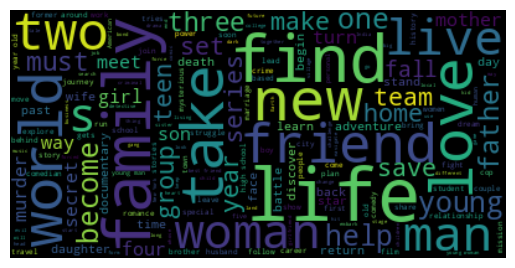

In [ ]:
# Chart - 10 visualization code

# Visualize the most common words in description
# Text Documents
text = ''.join(word for word in data['description'])

# Create the word cloud
wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)

# Plot the word cloud
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is appropriate for visualizing the most frequent words in a text corpus.  It visually represents the prominence of words based on their frequency, making it easy to identify the most common themes and topics.  In the context of movie/show descriptions, it helps quickly understand recurring themes or keywords.

##### 2. What is/are the insight(s) found from the chart?

The word cloud for movie/show descriptions will reveal the most frequent words.  These words likely represent common themes, genres, or subjects prevalent in the descriptions. For example, words like "life", "love", "family", "new", or genre-related terms might appear frequently, indicating popular themes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
* Content Strategy: Understanding common themes can help shape content acquisition and original production strategies.  If specific genres or topics are highly represented, it signals audience preference and justifies investment in similar content.
* Marketing: The most frequent words can be leveraged for targeted marketing campaigns, highlighting the prevalent themes to attract viewers.
* Content Recommendations: The insights can improve the recommendation engine by associating frequently co-occurring words with user preferences, thereby suggesting more relevant movies/shows.

**Negative Impacts:**
* Over-Saturation:  If content production focuses too heavily on the most frequent themes, it could lead to a lack of diversity and alienate viewers seeking different genres or topics.  Over-saturation of a specific theme could also lead to audience fatigue.
* Misinterpretation:  While frequent words offer a general overview, they might not capture the nuances of individual descriptions.  Over-reliance on these words alone could lead to inaccurate interpretations of content and poor decision-making.
* Ignoring Niche Audiences: Focusing solely on the most popular themes might neglect niche genres or audiences with unique interests. Ignoring these audiences could result in a loss of potential subscribers or a reduction in audience engagement.

#### Chart - 11

In [ ]:
# seperating genre from listed_in columns for analysis purpose

genres = data['listed_in'].str.split(',' , expand = True).stack().reset_index(level = 1 , drop = True)
genres.head()

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns = {'index': 'genres' , 0:'count'})
genres[:10]

genres  count
0    International Movies   2323
1                  Dramas   1384
2                Comedies   1074
3           Documentaries    751
4                  Dramas    722
5      Action & Adventure    721
6  International TV Shows    690
7      Independent Movies    653
8               TV Dramas    642
9         Romantic Movies    528

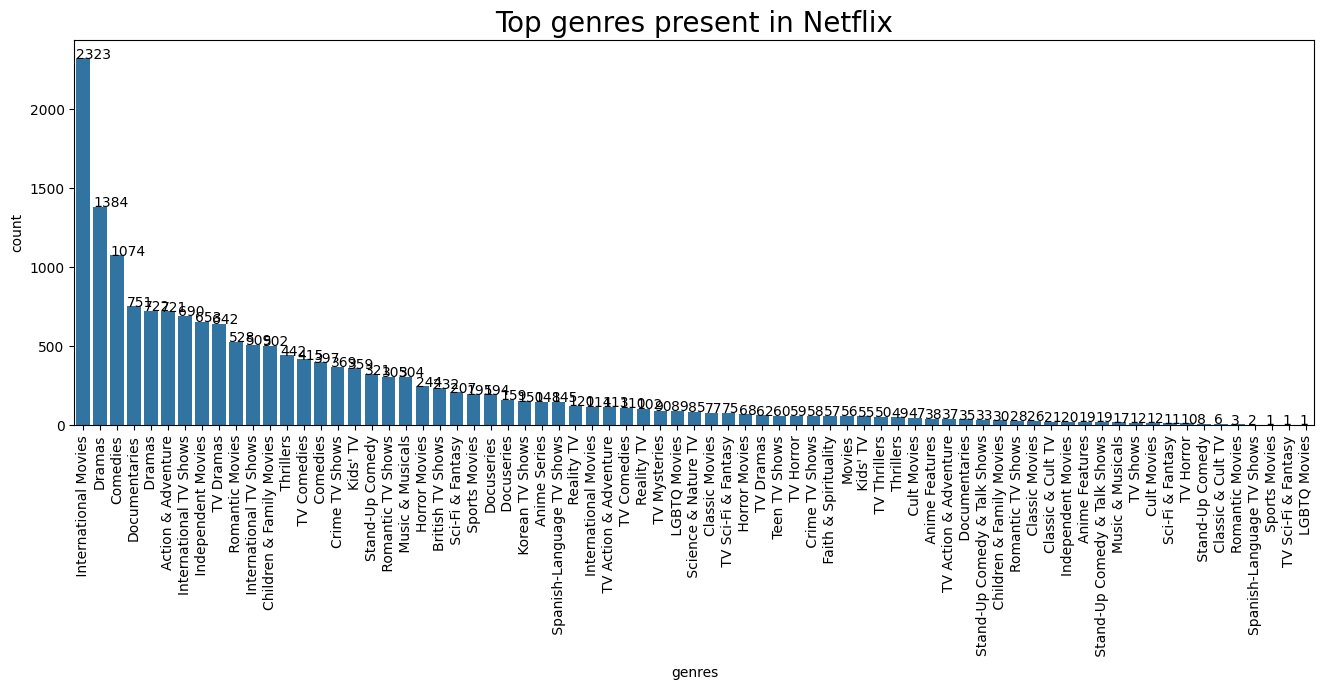

In [ ]:
# Chart - 11 visualization code

# Plot graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genres', y='count', data=genres)
graph.set_title('Top genres present in Netflix', size=20)
plt.xticks(rotation=90)

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Visualize the top geners present in Netflix
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is chosen because it effectively displays the frequency or count of each genre.  The horizontal orientation of the bars accommodates the potentially long genre names, preventing overlap, and makes comparison between genres straightforward.  The bar lengths directly represent the number of movies/shows in each genre, making it easy to quickly identify the most popular genres.

##### 2. What is/are the insight(s) found from the chart?

1. Highest number of genre belong from International movies, Dramas, Comedies respectively.
2. Least number of  genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**

* Targeted Content Creation: Understanding the most popular genres (International Movies, Dramas, Comedies) and directors (Raul Campos, Jan Suter, Marcus Raboy, Jay Karas) allows Netflix to focus on producing more content in those areas.  Collaborating with successful directors increases the likelihood of creating popular and engaging content.
* Regional Focus: Recognizing the high viewership in the US and India allows for targeted marketing and content creation relevant to those regions.  Developing content that resonates with specific demographics in those countries will likely increase viewership and subscription numbers.
* Improved Recommendations: Insights into common themes in titles and descriptions can inform the recommendation algorithm, leading to more accurate and relevant recommendations for users. This improves user satisfaction and reduces churn.


**Negative Impacts:**

* Over-saturation and Homogenization: Focusing solely on the most popular genres might lead to a lack of diversity in the content library.  Over-saturation of particular genres could lead to audience fatigue, and alienate viewers seeking niche content or a broader variety.
* Neglecting Less Popular Genres/Regions: While focusing on the most popular genres is beneficial, Netflix risks neglecting audiences interested in less popular genres or those residing in regions with lower viewership.  Ignoring these audiences could limit growth opportunities.
* Dependence on Successful Directors: Focusing too heavily on a few directors might create dependency, and if those directors become unavailable, Netflix may face a drop in content quality or quantity.  Diversification of collaborators is crucial for long-term sustainability.
* Ignoring Older Content: The analysis indicates a focus on newer releases. While this keeps the platform relevant, it may alienate users who prefer classic movies and TV shows.  A balance between new and classic content is key.

#### Chart - 12

Text(0.5, 1.0, 'Distribution of Content Types by Release Year')

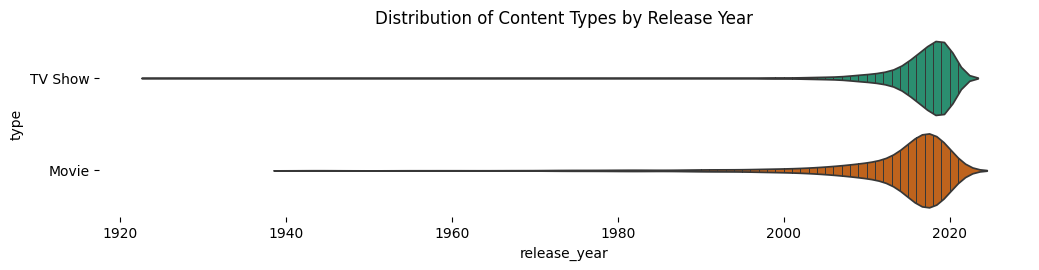

In [ ]:
# Chart - 12 visualization code

# Plot the distribution of content types w.r.t. release year
figsize = (12, 1.2 * len(data['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='release_year', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Content Types by Release Year')

##### 1. Why did you pick the specific chart?

A violin plot was chosen because it effectively displays the distribution of content types (movies vs. TV shows) across different release years.  The violin plot's shape shows the density of data points, indicating which release years have a higher concentration of movies or TV shows.  This visualization is particularly useful because it allows for the comparison of the distribution of two categorical variables across a numerical variable. It's more informative than a simple box plot because it provides a more complete picture of the data density, revealing more about the overall distribution.

##### 2. What is/are the insight(s) found from the chart?

The violin plot reveals the distribution of movies and TV shows across various release years. It can highlight trends such as:
* Changes in Content Mix: Are there more movies released in certain years compared to others, or vice-versa?
* Content Strategy Over Time: Has Netflix's strategy shifted over the years, favoring a greater proportion of movies or TV shows for different periods?
* Density of Releases:* Years where the violin plot is wider indicate more titles released within a particular content type during that period, as opposed to narrower violins which would suggest fewer titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
* Content Strategy Adjustment: Insights on content mix over time can help Netflix adjust its content strategy. If there's a noticeable trend toward movies in recent years, they may decide to double down on this or strategically allocate resources to increase TV show production.
* Targeted Acquisition: By examining the distribution, Netflix can target specific years for content acquisition or original production.
* Understanding Audience Preference: Shifts in the distribution might reflect evolving audience preferences. More movies in certain periods might mean greater user engagement with that content type, indicating that there is a demand for specific genres or types of content during a certain time.

**Negative Impacts:**
* Over-reliance on a Single Type: A very imbalanced distribution may suggest over-reliance on a single content type in a particular time period. If this doesn't match the actual user demand, it may lead to lower engagement and subscription churn.
* Missed Opportunities: A lack of diversity could mean Netflix is missing opportunities to cater to a larger audience by not offering enough variety.
* Licensing Challenges: If the distribution reveals gaps in content for specific periods, it might highlight challenges in obtaining licenses for the desired titles.

#### Chart - 13

Text(0.5, 1.0, 'Distribution of Ratings by Release Year')

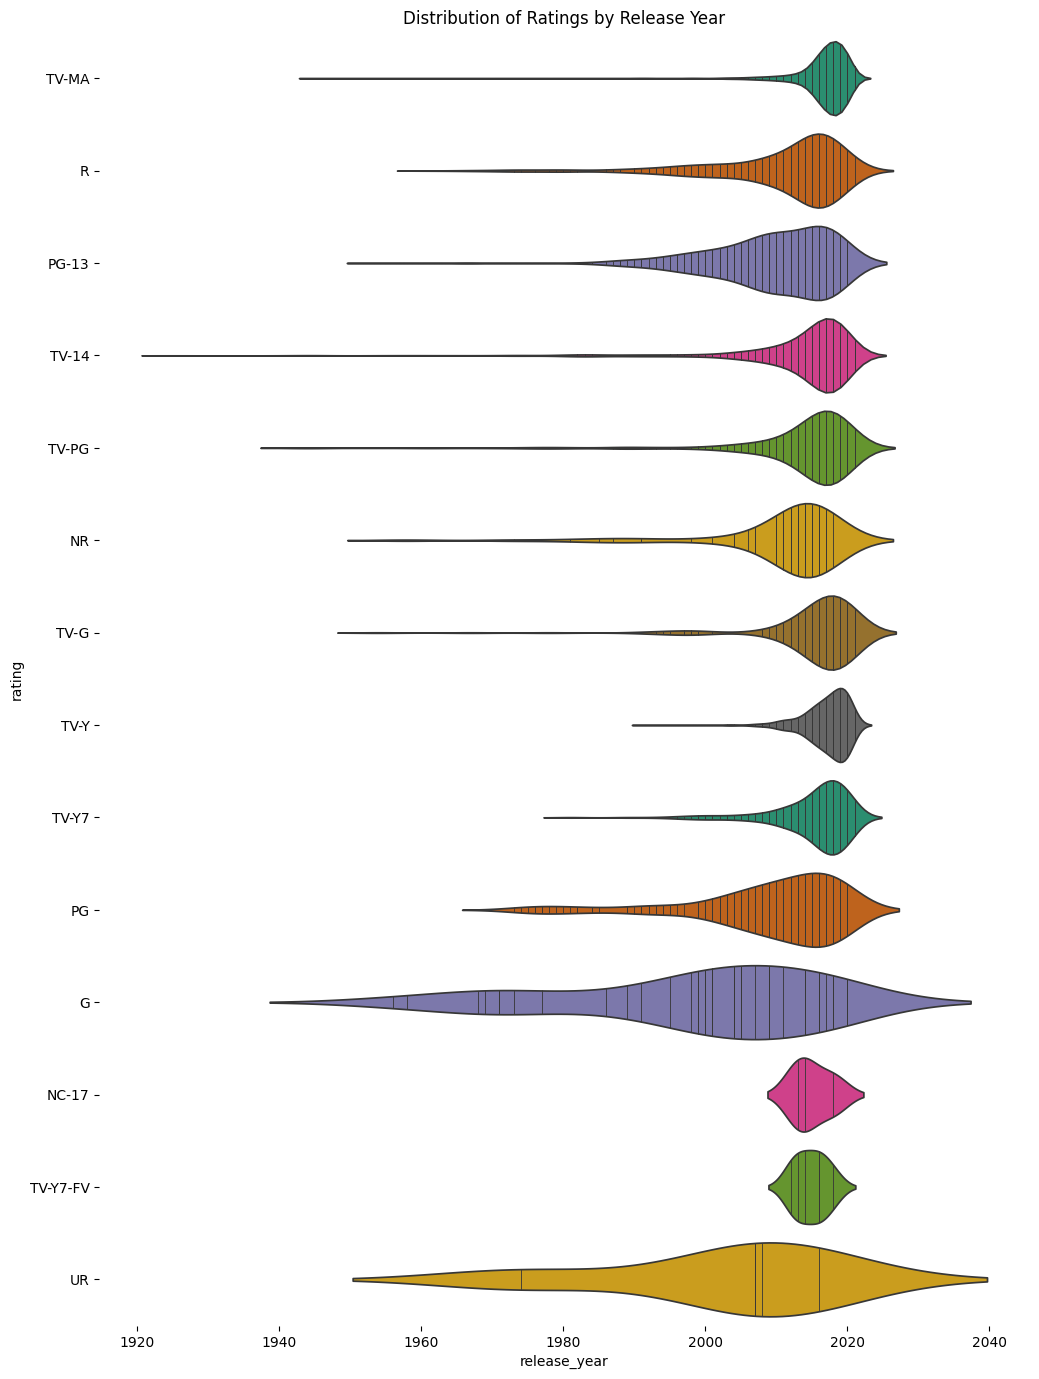

In [ ]:
# Chart - 13 visualization code

# Plot the distribution of ratings w.r.t. release year
figsize = (12, 1.2 * len(data['rating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='release_year', y='rating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Ratings by Release Year')

##### 1. Why did you pick the specific chart?

The distribution of ratings over several release years can be successfully visualized with a violin plot.  It illustrates how the predominance of different age levels has changed over time by displaying the density of different ratings (such as TV-MA and PG-13) for each year.  Because it shows the shape of the distribution and provides a sharper image of the data, this is more instructive than a straightforward bar chart or box plot.

##### 2. What is/are the insight(s) found from the chart?

The violin plot reveals trends in content maturity levels over the years.  Wider violin sections for a specific rating in a given year suggest a higher concentration of content with that rating during that time.  Narrower sections indicate fewer releases with that specific rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
* Content Strategy:  Understanding rating trends allows Netflix to adjust its content strategy.  If a particular rating category is becoming increasingly popular, they can focus on acquiring or producing more content within that range.
* Targeted Marketing:  Knowing the prevalent ratings in specific years enables more effective marketing. Campaigns can highlight content that aligns with the popular rating categories of a given period, thus increasing engagement.
* Original Content Production: The insights can inform decisions about original content production, aligning with audience preferences over time.

**Negative Impacts:**
* Over-saturation of a Rating: An over-concentration of one rating could lead to user dissatisfaction due to a lack of diversity in content maturity.  
* Regulatory Risks:  A shift towards more mature ratings might create challenges with regulatory compliance in certain regions.
* Limited Appeal: Over-reliance on a specific rating could alienate a segment of the audience who prefers different levels of content maturity, thus leading to negative growth.

#### Chart - 14 - Correlation Heatmap

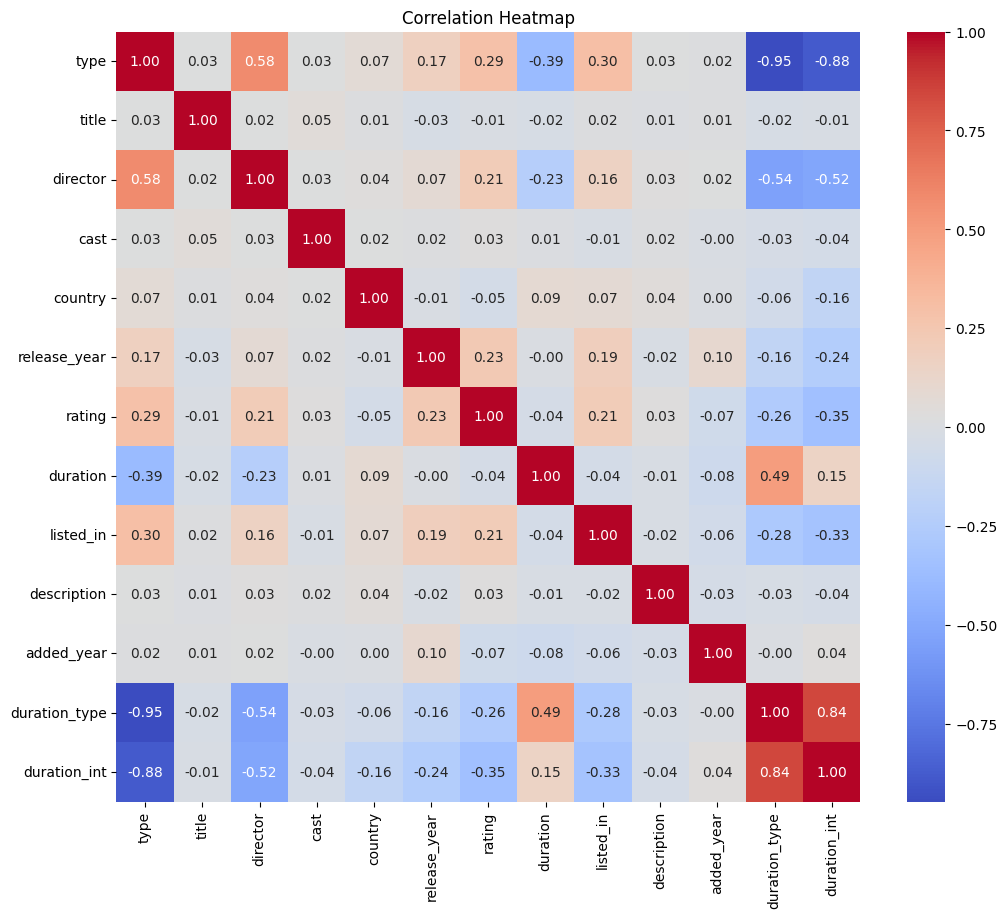

In [ ]:
# Correlation Heatmap visualization code
from sklearn.preprocessing import LabelEncoder

# Remove timestamp column
if 'date_added' in data.columns:
    data = data.drop(['date_added'], axis=1)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To show the connections between the various numerical features in the dataset, a correlation heatmap was selected.  Heatmaps are excellent for displaying the direction and intensity of relationships between several variables at once.  It is simple to quickly recognize strong positive, strong negative, and weak correlations since the color intensity exactly reflects the correlation coefficient. Because it gives a brief summary of the variables' pairwise associations, this is particularly helpful when working with a large number of variables.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals the strength and direction of linear relationships between the different features after label encoding the categorical features.  Insights include:

* Strong Positive Correlations:  Bright red squares indicate strong positive correlations.  Features with a strong positive correlation tend to increase or decrease together.  Understanding these relationships can help in feature selection (e.g., removing redundant features) and building predictive models.
* Strong Negative Correlations: Dark blue squares indicate strong negative correlations.  Features with a strong negative correlation move in opposite directions.
* Weak Correlations:  Colors closer to white or light yellow suggest weak correlations. These features may have little or no linear relationship with each other.
* Multicollinearity:  High correlations between predictor variables (multicollinearity) can affect the stability and interpretability of some statistical models.  Identifying these relationships is crucial in data preprocessing. For example, if two or more features are highly correlated, it might be beneficial to combine or remove one of them.
* Relationship with the Target Variable:  By examining the correlations between each feature and the target variable (if one exists in the dataset), you can identify which features are most strongly associated with the outcome.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

The pairwise correlations between several numerical variables in the dataset were visualized using a pair plot (also called a scatterplot matrix).  It's an extremely efficient method for rapidly investigating the patterns and correlations between every pair of variables at once.  The distribution of a single variable (often a histogram or kernel density estimate) is displayed in each plot on the matrix's diagonal. The scatterplots between every possible pair of variables are displayed in the off-diagonal plots, giving a visual depiction of their relationship.

##### 2. What is/are the insight(s) found from the chart?

The pair plot allows for the observation of several key patterns:

* Linear Relationships:  Look for scatterplots that appear to form a straight line.  This indicates a linear relationship between the two variables. The slope of the line suggests the direction of the relationship (positive or negative).
* Non-Linear Relationships:  Some relationships may not be linear.  The pair plot can reveal curves or other non-linear patterns in the data.
* Clustering or Grouping:  The plots might show clusters of data points, indicating subgroups within the data that have different characteristics.
* Outliers:  Unusual data points that deviate significantly from the overall pattern can be easily spotted.
* Distributions: The diagonal plots display the distribution of each variable, helping in understanding the range, central tendency, and variability of each feature.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. **Hypothesis:** There is a statistically significant difference in the average duration of movies and TV shows on Netflix.

2. **Hypothesis:**  The distribution of content ratings (e.g., TV-MA, PG-13) varies significantly across different countries.

3. **Hypothesis:** The number of movies and TV shows released per year on Netflix exhibits a statistically significant upward trend over the past decade.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the average duration of movies and TV shows on Netflix. \

Alternate hypothesis: There is a statistically significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Import independent samples t test
from scipy.stats import ttest_ind

movies = data[data['type'] == 0]['duration']
tv_shows = data[data['type'] == 1]['duration']

# Calculate t statistic and p-value
t_statistic, p_value = ttest_ind(movies, tv_shows)

# Print t statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

# Conclude the test
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in the average duration.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average duration.")

T-statistic: 37.11144317832792
P-value: 9.922489870778312e-278
Reject the null hypothesis. There is a statistically significant difference in the average duration.


##### Which statistical test have you done to obtain P-Value?

The statistical test I have done to obtain P-Value is independent samples t-test.

##### Why did you choose the specific statistical test?

I chose the independent  t-test because we are comparing the means of two independent groups: the duration of movies and the duration of TV shows.  The t-test is appropriate when:

1. Data is approximately normally distributed: While not explicitly checked in the provided code, the assumption is that the durations of movies and TV shows are approximately normally distributed.  Visual inspection of the distributions (perhaps using histograms or Q-Q plots) would be helpful to verify this.

2. Independent Groups: The duration of a movie is independent of the duration of a TV show.  Observations in one group do not influence observations in the other.

3. Equal or Unequal Variances: The t-test can handle situations with equal or unequal variances between the groups. The provided code uses `ttest_ind`, which performs the test assuming unequal variances by default (although Welch's t-test is often preferred when the variances aren't equal,  `ttest_ind` can also be adjusted to perform the test assuming equal variances if this condition is met).

The t-test assesses if the difference between the two group means is statistically significant, considering the variability within each group and the sample size.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The distribution of content ratings does not vary across different countries. \
Alternate hypothesis: The distribution of content ratings varies significantly across different countries.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['country'], data['rating'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print chi-squared statistic, p-value, and degrees of freedom
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05 #Significance level

# Conclude the test
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of content ratings varies significantly across different countries.")
else:
    print("Fail to reject the null hypothesis. The distribution of content ratings does not vary significantly across different countries.")

Chi-squared statistic: 16245.45458000527
P-value: 0.0
Degrees of freedom: 8853
Reject the null hypothesis. The distribution of content ratings varies significantly across different countries.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Chi-squared test of independence.

##### Why did you choose the specific statistical test?

I chose the Chi-squared test of independence because we are examining the relationship between two categorical variables: "country" and "rating."  The Chi-squared test is appropriate when:

1. Categorical Variables: Both variables being compared are categorical.  In this case, "country" represents different geographic locations, and "rating" represents different maturity ratings for the content (e.g., TV-MA, PG-13).

2. Independence Assumption:  We assume that the rating of a piece of content is independent of its country of origin. The Chi-squared test assesses if the observed distribution of ratings across countries deviates significantly from what we would expect if there were no association between the two variables.

3. Contingency Table: The data is summarized in a contingency table, which shows the frequency of each combination of categories for the two variables. `pd.crosstab` in the code generates this table.

4. Sufficient Sample Size: The Chi-squared test generally works well with a reasonable sample size.  While not explicitly checked, it's important to ensure that the expected frequencies in each cell of the contingency table are sufficiently large (usually at least 5 in most cells) for the Chi-squared approximation to be valid.


The Chi-squared test calculates a statistic that measures the difference between the observed frequencies and the expected frequencies (assuming no relationship between the variables).  The p-value represents the probability of observing such a large difference (or larger) if there were truly no association between country and rating. A small p-value suggests that the observed difference is unlikely due to random chance, and we reject the null hypothesis that there's no association.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The number of movies and TV shows released per year on Netflix does not exhibit an upward trend over the past decade.
\
Alternate hypothesis: The number of movies and TV shows released per year on Netflix exhibits a statistically significant upward trend over the past decade.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Group the content released w.r.t. their release year
releases_per_year = data.groupby('release_year').size().reset_index(name='counts')

# Filter for the last 10 years
recent_releases = releases_per_year[releases_per_year['release_year'] >= releases_per_year['release_year'].max() - 9]

# Perform a linear regression to test for an upward trend
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(recent_releases['release_year'], recent_releases['counts'])

print(f"P-value from Linear Regression: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant upward trend.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant upward trend.")

P-value from Linear Regression: 0.3090226099232057
Fail to reject the null hypothesis. There is no statistically significant upward trend.


##### Which statistical test have you done to obtain P-Value?

I performed Linear Regression to obtain P-Value.

##### Why did you choose the specific statistical test?

A linear regression is appropriate here because it directly tests the relationship between two continuous variables: year and the number of releases. The p-value associated with the slope coefficient indicates the significance of the trend. A small p-value suggests that the slope is significantly different from zero, implying a significant upward or downward trend.  In this case, we're looking for an upward trend.

## ***6. Data Pre-processing***

### 1. Handling Missing Values

<Axes: >

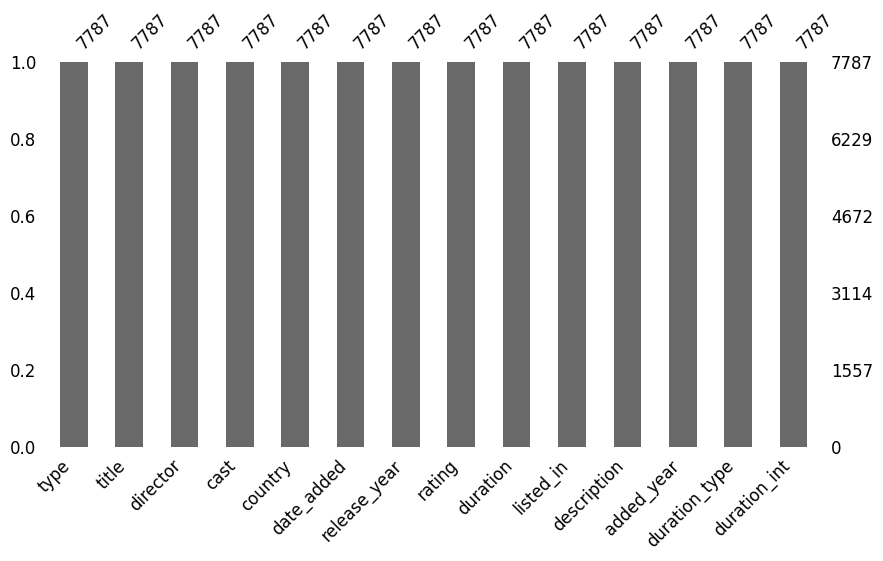

In [ ]:
# Ploting Missing values
import missingno as msno
msno.bar(data,figsize = (10,5) , fontsize = 12)

There are no missing values left to be handled as we have Imputated the missing values while wrangling the data.

**Missing value imputation techniques used:**

1. Filling with "Unknown":
    - Columns: 'director', 'cast', 'country'
    - Justification:  These columns contain categorical data where "Unknown" is a valid category.  Replacing missing values with "Unknown" preserves the information that these attributes were not recorded.  It's a good approach for these specific cases, preventing information loss in the other attributes that do have information, while still representing the absence of the original data.

2. Filling with Mode:
    - Column: 'rating'
    - Justification: The 'rating' column is categorical, and using the mode (most frequent value) maintains the distribution of the original data. Since the rating system typically tends to have some values that appear more often than others, using the mode is more sensible than random imputation.

3. Filling with Median:
    - Column: 'duration_int', 'date_added', 'added_year'
    - Justification: The 'duration_int' column contains numerical values. The median is less susceptible to the influence of outliers compared to the mean, thus providing a more robust imputation for this numerical feature.  The median is used for the 'date_added' and 'added_year' columns in order to fill in missing values by replacing them with the most central value.

4. Dropping Rows:
    - Column: 'rating' (rows with missing values)
    - Justification:  After applying other imputation techniques, if there still exist missing values in 'rating', rows with missing values in the 'rating' column were removed.  Because this column was crucial for analysis, preserving the other data was considered more important by removing these specific records.

### 2. Handling Outliers

<Axes: >

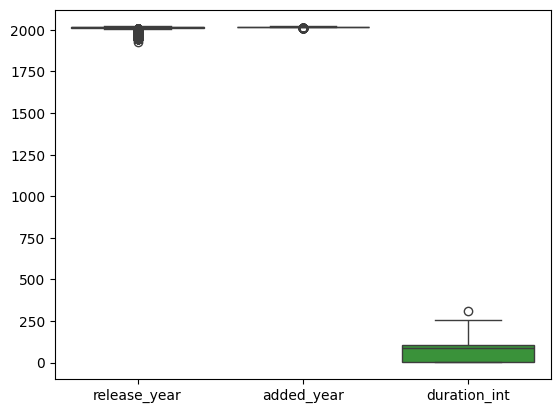

In [ ]:
# boxplot for outlier detection
sns.boxplot(data  = data)

- Almost columns of the data are in textual format except 'release_year', 'added_year', and 'duration_int'.
- The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

## ***7. Textual Data Preprocessing***


**Modeling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

###1. Clustering Attributes

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [ ]:
# Create tags column using all text column which is used for model building purpose
data['tags'] = data['description'].astype(str) + data['listed_in'].astype(str) + data['rating'].astype(str) + data['cast'].astype(str) + data['country'].astype(str) + data['director'].astype(str)

- We have successfully added all the necessary data into a single column.

In [ ]:
data.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilUnknown'

###2. Removing Stopwords and Lower Casing

Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

**Stop words** are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

**Lowercasing words** is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:
1. Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
2. Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [ ]:
import nltk
from nltk.corpus import stopwords
import numpy as np

# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [ ]:
# Create a function to remove the stopword
def stopwords(text):
  '''a function for removing the stopword and lowercase the each word'''
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)   # returns the joined list of words with space separator

In [ ]:
# Apply stopwords function
data['tags'] = data['tags'].apply(stopwords)

In [ ]:
data.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazilunknown'

- We have successfully removed all the stopwords and converted the corpus to lowercase.

###3. Removing Punctuations

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# Create a function to remove punctuations
def removing_punctuation(text):
  '''a function for removing punctuation'''
  import string
  translator  = str.maketrans('','',string.punctuation)   # replaces the punctuations with no space, which in effect deletes the punctuation marks
  return text.translate(translator)   # returns the text stripped of punctuation marks

In [ ]:
# Apply remove_punctuation function
data['tags'] = data['tags'].apply(removing_punctuation)

In [ ]:
data.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazilunknown'

- We have successfully remove all the punctuation marks from the corpus.

###4. Stemming

Use **SnowballStemmer** to generate a meaningful word out of corpus of words.

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks, as it allows you to treat different inflected forms of a word as the same word, which can be useful for tasks like information retrieval or text classification.

For example, the words "run," "runs," "ran," and "running" are all different inflected forms of the same word "run," and a stemmer can reduce them all to the base form "run."

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Create an object of stemming function
stemmer = SnowballStemmer('english')

def stemming(text):
  '''a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return ''.join(text)

In [ ]:
# Applying stemming function to tag column
data['tags'] = data['tags'].apply(stemming)
data['tags'].head()

0    futurelitinhabitislandparadisfarcrowdslumgeton...
1    devastearthquakhitmexicocititrapsurvivorwalkli...
2    armirecruitfounddeadfellowsoldierforcconfrontt...
3    postapocalyptworldragdolrobothidefeardangermac...
4    brilliantgroupstudentbecomcardcountexpertinten...
Name: tags, dtype: object

In [ ]:
data.tags[0]

'futurelitinhabitislandparadisfarcrowdslumgetonechancjoin3savesqualorinterntvshowtvdramatvscififantasytvmajoãomiguelbiancacomparatomichelgomerodolfovalentvanezaoliveirarafaellozanovivianportomelfronckowiaksergiomambertizezémottacelsofrateschibrazilunknown'

  - We are done with stemming the corpus.

###5. Text Vectorization

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

We can vectorize the corpus using **TFIDF vectorizer**, where TFIDF stands
for **Term Frequency Inverse Document Frequency**.

- #### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- #### IDF(t) = $log_e(\frac{Total\  number \ of \ documents}{ Number \  of \ documents \  with \  term \ t \ in \ it })$

In [ ]:
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words = 'english' , lowercase = False, max_features = 10000)

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items( )

In [ ]:
# Print the number of independet features created from "tags" columns (max_features=10000)
print(len(dictionary))

8716


In [ ]:
# Convert the vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7787, 8716)
datatype : <class 'numpy.ndarray'>


## ***8. Feature Engineering (Feature Manipulation & Selection)***

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Combine features
# Create a new feature 'duration_category' based on 'duration'
# Convert 'duration' column to numeric, removing non-numeric characters
data['duration'] = pd.to_numeric(data['duration'].str.extract('(\d+)')[0], errors='coerce')
data['duration_category'] = pd.cut(data['duration'], bins=[0, 60, 120, 180, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'])


# Interaction features
# Create an interaction term between 'release_year' and 'duration'
data['year_duration_interaction'] = data['release_year'] * data['duration']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Feature Selection using correlation
# Remove highly correlated features

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

correlation_matrix = numeric_data.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust threshold if needed
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop highly correlated features from the original DataFrame
data.drop(labels=correlated_features, axis=1, inplace=True) # Drop highly correlated features

The feature selection method used here is Correlation-based feature selection because multicollinearity in statistical models can result from highly correlated features.  In addition to making it challenging to ascertain the precise impact of each feature on the target variable, multicollinearity can raise the variance of the model's coefficients, which can result in instability and overfitting.  These issues can be resolved by eliminating one of the connected features.  The arbitrary criterion of 0.8 may need to be changed depending on the particular dataset and the downstream models' needs.  While a lower criterion would result in more aggressive feature elimination, a higher threshold would remove fewer features.

Since strongly correlated features can lead to multicollinearity in statistical models, correlation-based feature selection is the feature selection method that I believe is most crucial.  Multicollinearity can increase the variance of the model's coefficients, leading to instability and overfitting, as well as making it difficult to determine the exact effect of each feature on the target variable.  By removing one of the linked characteristics, these problems can be fixed.  Depending on the specific dataset and the requirements of the downstream models, it might be necessary to modify the arbitrary criterion of 0.8.  A higher threshold would eliminate fewer features, whereas a lower criterion would lead to more aggressive feature deletion.

#### 3. Data Transformation

In [ ]:
# Transform Your data

# Feature transformation (log transformation for skewed data)
#  Handle potential 0 values before log transformation)
data['duration_log'] = np.log1p(data['duration']) #log1p to handle 0

The log transformation (`data['duration_log'] = np.log1p(data['duration'])`) was applied to the 'duration' column to address skewness.  The `log1p` function (log(1+x)) is used instead of a simple log transformation to handle potential zero values in the 'duration' column.  A simple log transformation would result in an error when encountering zero.

Log transformations are commonly used when a variable has a skewed distribution (a long tail on one side).  A log transformation compresses the range of values, making the distribution more symmetric and closer to a normal distribution.  Many statistical methods assume normality, and transforming skewed data can improve the performance and reliability of these methods.

By using `log1p`, the code handles potential zero values, preventing errors, and the resulting `duration_log` feature is more suitable for statistical analysis.  This transformation helps to stabilize the variance and make the data more amenable to linear models or other statistical techniques that benefit from normally distributed variables.

#### 4. Data Scaling

In [ ]:
# Scaling your data

# Feature scaling (Min-Max scaling for numerical features)
from sklearn.preprocessing import MinMaxScaler
numerical_cols = data.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

I used Min-Max scaling.  Min-Max scaling transforms features by scaling them to a specific range, typically between 0 and 1.  This is useful when the algorithm is sensitive to feature magnitudes and/or when features have different scales.  It's particularly appropriate when you know the approximate minimum and maximum values for your feature and you want to maintain the relative distances between values after transformation.

#### 5. Dimesionality Reduction

We can use **PCA (Principal component Analysis)** to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [ ]:
# Use PCA to reduce dimensionality
pca = PCA(random_state = 42)
pca.fit(vector)

PCA(random_state=42)

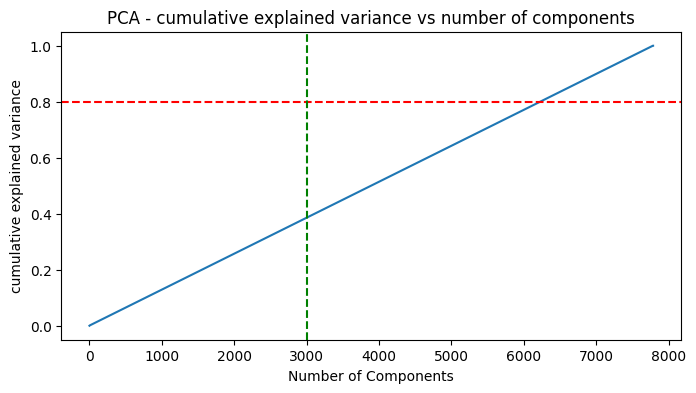

In [ ]:
# Explain variance for different number of components
plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of Components')
plt.ylabel('cumulative explained variance')
plt.axhline(y = 0.8 , color = 'red' , linestyle = '--')
plt.axvline(x = 3000,color = 'green',linestyle = '--')
plt.show()

- We find that 100% of the variance is explained by about ~7500 components.
- Also, more than 80% of the variance is explained just by 3000 components.
- Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# Reduce the dimensions to 3000 using pca
pca = PCA(n_components = 3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [39]:
# Transform features
X = pca.transform(vector)

# Shape of transformed vectors
X.shape

(7787, 3000)

#### 6. Handling Imbalanced Dataset

In [40]:
# Define a function to check imbalance in the data
def is_imbalanced(df, target_column):
    """
    Checks if the dataset is imbalanced based on the target variable.
    """
    class_counts = df[target_column].value_counts(normalize=True)
    # You can define a threshold for imbalance (e.g., 0.8 or 0.9).
    imbalance_threshold = 0.8
    is_imbalanced = any(class_counts < 1 - imbalance_threshold) or any(class_counts > imbalance_threshold)
    if is_imbalanced:
      print("Class distribution:\n",class_counts)
      return True
    else:
      return False

# Replace 'type' with the name of your target column
if is_imbalanced(data, 'type'):
  print("The dataset appears to be imbalanced.")
else:
  print("The dataset does not appear to be imbalanced.")

The dataset does not appear to be imbalanced.


## ***9. ML Model Implementation***

### ML Model - 1: K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

How does it work?
1. The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.
2. Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.
3. The algorithm then updates the centroids to be the mean of the samples in each cluster.
4. teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until

Visualize the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

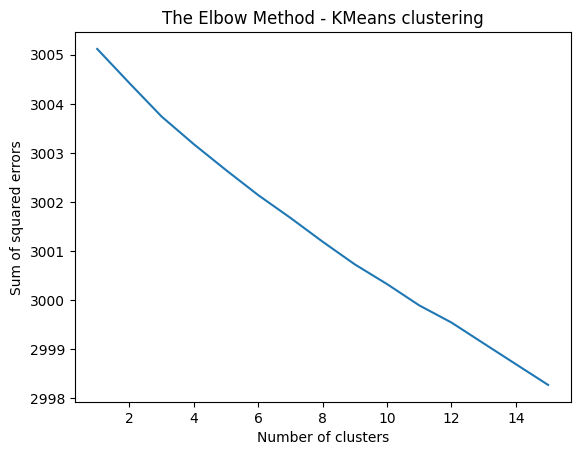

In [41]:
#Elbow method to find the optimal value of k

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1,16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k , init = 'k-means++' , random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1,16),SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

- The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

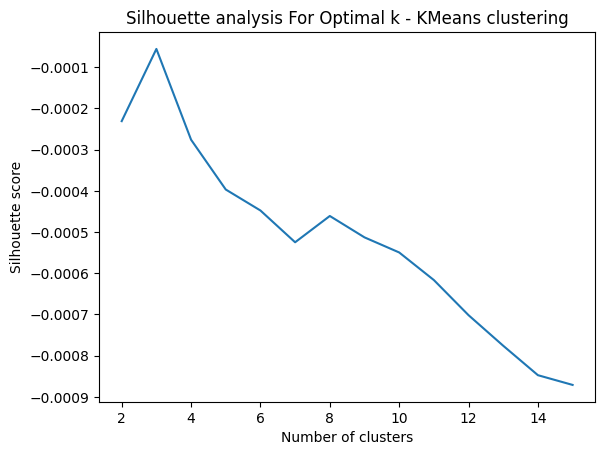

In [42]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

- The highest Silhouette score is obtained for 3 clusters.

Building 2 clusters using the k-means clustering algorithm:

In [43]:
# Clustering the data into 3 clusters
kmeans = KMeans(n_clusters=3,init = 'k-means++' , random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [44]:
# Evaluation metrices - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X,kmeans.labels_)

print(kmeans_distortion,kmeans_silhouette_score)

3003.7409221577245 -5.564472105878839e-05


In [45]:
# Add a kmeans cluster number attribute
data['kmeans_cluster'] = kmeans.labels_

In [46]:
data.sample(2)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                  title          director  \
263     Movie  Aşk Tesadüfleri Sever  Ömer Faruk Sorak   
1043  TV Show                  Booba           Unknown   

                                                   cast country rating  \
263   Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta...  Turkey  TV-MA   
1043                                        Roman Karev  Russia  TV-Y7   

                                          listed_in  \
263   Dramas, International Movies, Romantic Movies   
1043                          Kids' TV, TV Comedies   

                                            description  kmeans_cluster  
263   A series of coincidences brings two star-cross...               0  
1043  The world is a mystery to little Booba. But he...               2

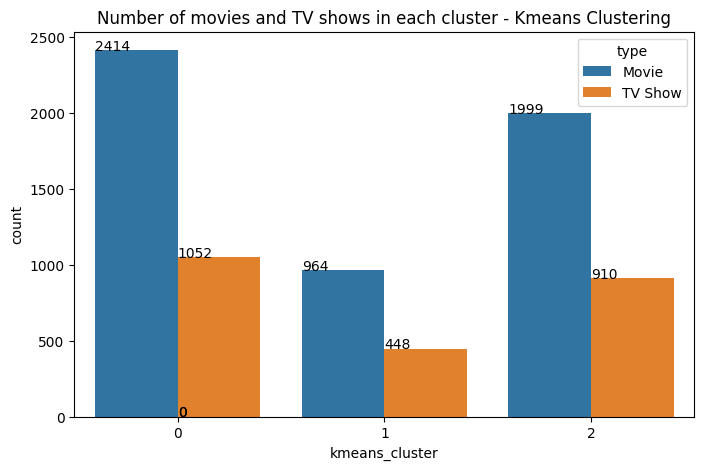

In [47]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x = 'kmeans_cluster' , data = data , hue = 'type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# Add value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

  - Successfully built 3 clusters using the k-means clustering algorithm.

#### Build wordclouds for different clusters in K-Means Clustering

In [48]:
# Create a function for building a wordcloud for the movies/shows
def kmeans_wordcloud(cluster_number,column_name):
  data_wordcloud = data[['kmeans_cluster' , column_name]].dropna()
  data_wordcloud = data_wordcloud[data_wordcloud['kmeans_cluster'] == cluster_number]

  # Text documents
  text = ''.join(word for word in data_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords = set(STOPWORDS) , background_color='white').generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

##### Word Cloud on "description" column for different cluster

cluster0


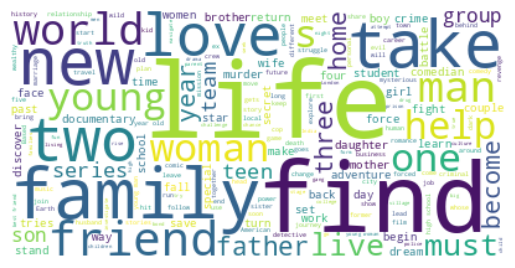

cluster1


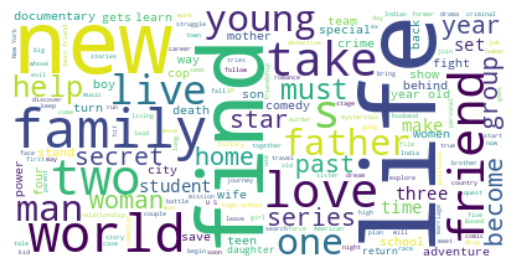

cluster2


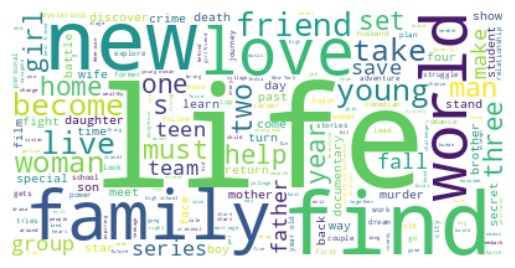

In [51]:
for i in range(3):
  print(f'cluster{i}')
  kmeans_wordcloud(i,'description')

##### Word Cloud on "cast" column for different cluster

cluster0


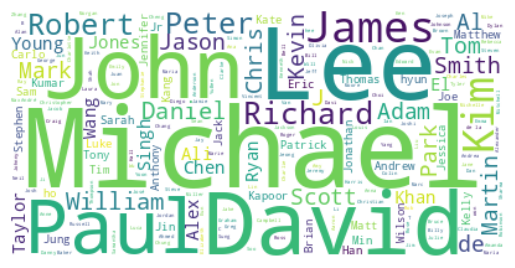

cluster1


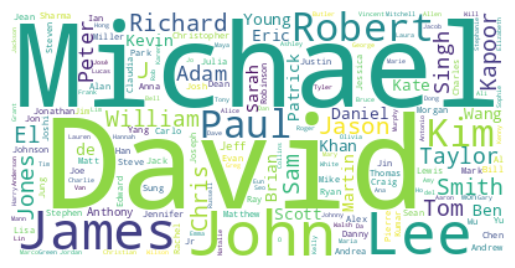

cluster2


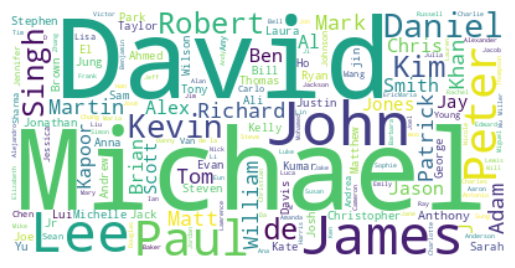

In [52]:
for i in range(3):
  print(f'cluster{i}')
  kmeans_wordcloud(i,'cast')

##### Word Cloud on "director" column for different cluster

cluster0


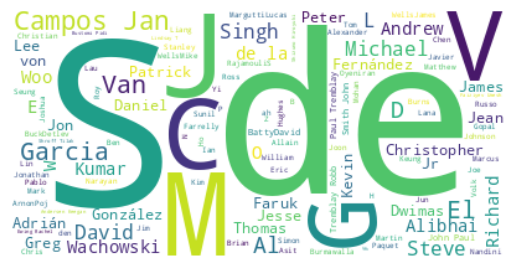

cluster1


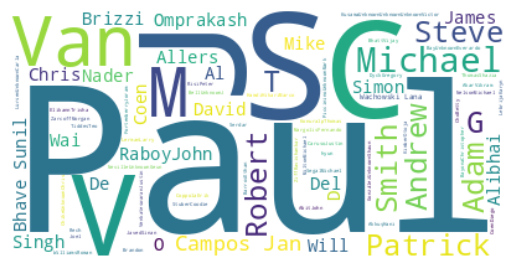

cluster2


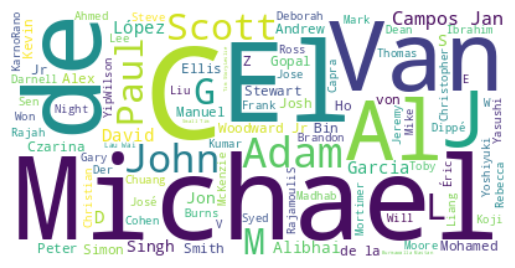

In [53]:
for i in range(3):
  print(f'cluster{i}')
  kmeans_wordcloud(i , 'director')

##### Word Cloud on "listed_in" (genre) col for different cluster

cluster 0


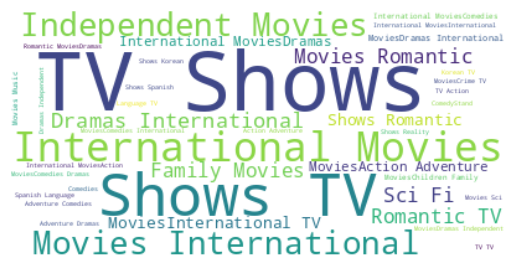

cluster 1


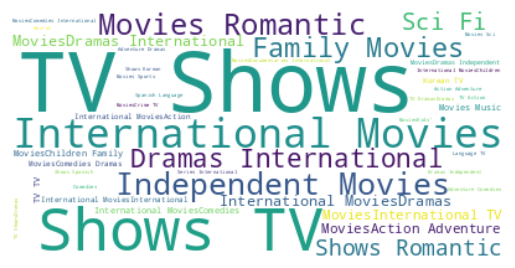

cluster 2


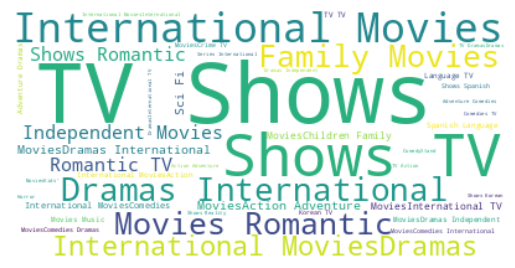

In [55]:
for i in range(3):
  print(f'cluster {i}')
  kmeans_wordcloud(i,'listed_in')

##### **Word Cloud on "country" column column for different cluster**

cluster 0


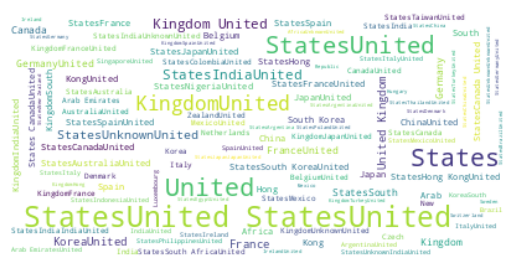

cluster 1


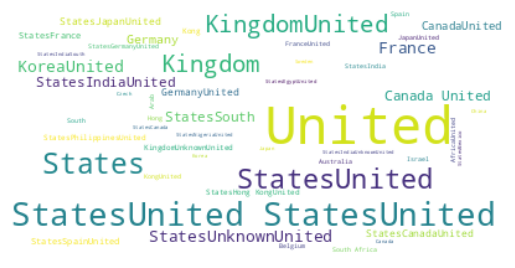

cluster 2


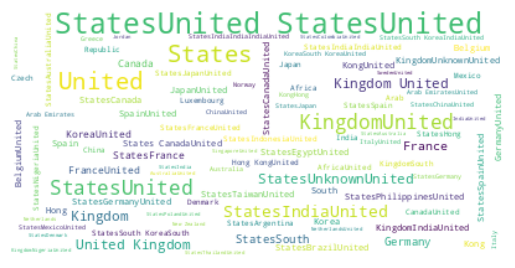

In [56]:
for i in range(3):
  print(f'cluster {i}')
  kmeans_wordcloud(i,'country')

##### **Word Cloud on "title" column column for different cluster**

cluster 0


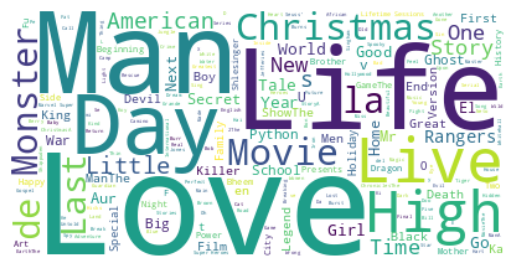

cluster 1


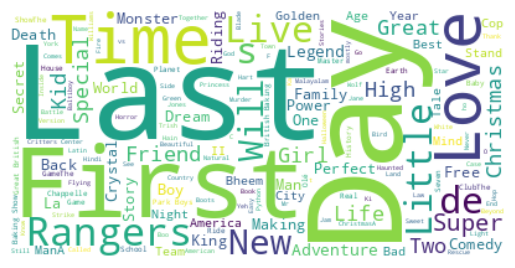

cluster 2


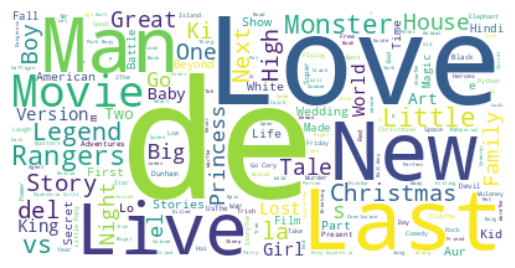

In [57]:
for i in range(3):
  print(f'cluster {i}')
  kmeans_wordcloud(i,'title')

### ML Model - 2: Hierarchical clustering

Building clusters using the **Agglomerative (hierarchical) clustering** algorithm.

Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

How does it work?
1. The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix.
2. Then selects the two closest clusters and merges them into a single cluster.
3. Above process is repeated until all the samples are in the same cluster.

The resulting clusters form a tree-like structure called a dendrogram, which shows the relationships between the clusters at each level of the hierarchy.

Visualize the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

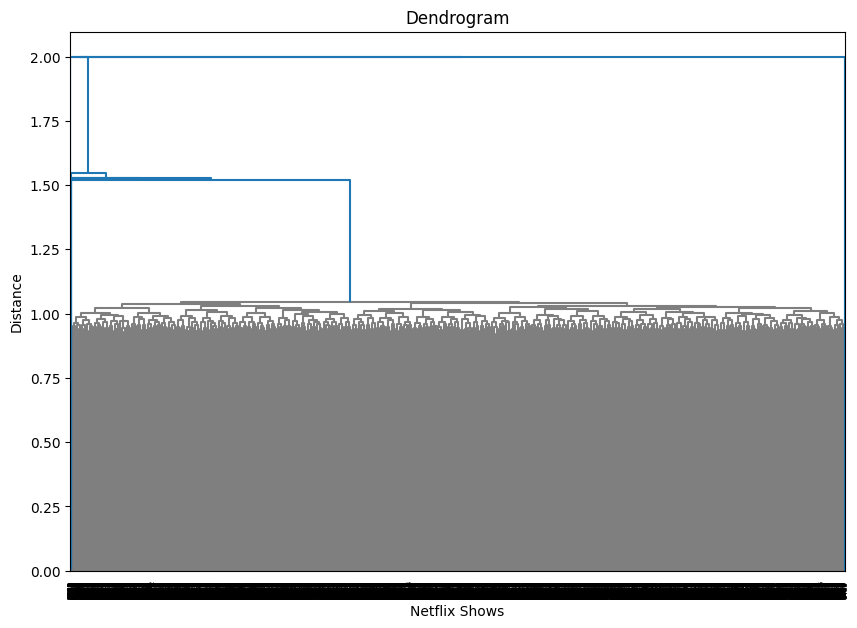

In [58]:
# Build a dendogram to decide the number of clusters
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Plot the dendogram
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

In [60]:
# Fit hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, linkage = 'ward')
hierarchical.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
# Add a hierarchical cluster number attribute
data['hierarchical_cluster'] = hierarchical.labels_

In [62]:
data.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                                           title  \
6269    Movie                                The Darkest Dawn   
3916    Movie                                  Mansfield Park   
3955    Movie  Martin Luther: The Idea that Changed the World   
5602  TV Show                                          Signal   
2465    Movie                                       GoldenEye   

             director                                               cast  \
6269          Unknown                                            Unknown   
3916  Patricia Rozema  Frances O'Connor, Embeth Davidtz, Jonny Lee Mi...   
3955      David Batty                                    Hugh Bonneville   
5602          Unknown  Kim Hye-su, Lee Je-hoon, Cho Jin-woong, Jang H...   
2465  Martin Campbell  Pierce Brosnan, Sean Bean, Izabella Scorupco, ...   

                            country rating  \
6269                 United Kingdom  TV-MA   
3916                 United Kingdom  PG-13   
3955                  United States  TV-PG   
5602                    South Korea  TV-MA   
2465  United Kingdom, United States  PG-13   

                                              listed_in  \
6269  Action & Adventure, Independent Movies, Intern...   
3916             Comedies, Dramas, International Movies   
3955                Documentaries, Faith & Spirituality   
5602  Crime TV Shows, International TV Shows, Korean...   
2465                                 Action & Adventure   

                                            description  hierarchical_cluster  
6269  An aspiring filmmaker records the chaos of an ...                     0  
3916  A poor heroine is sent to live with wealthy re...                     0  
3955  This docudrama tells the dramatic story of the...                     0  
5602  Communicating via a walkie-talkie that transce...                     0  
2465  Pierce Brosnan takes his first turn as debonai...                     0

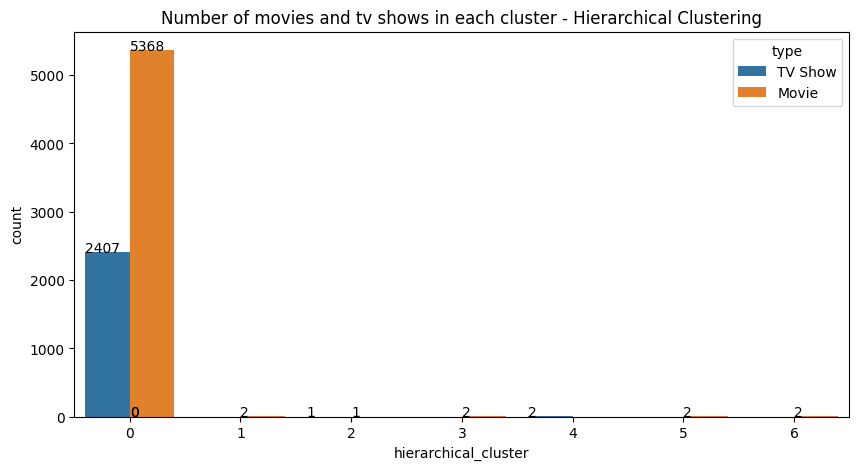

In [64]:
# Number of movies and tv shows in each cluster
plt.figure(figsize = (10,5))
graph = sns.countplot(x = 'hierarchical_cluster' , data = data  , hue = 'type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# Add value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

#### Building wordclouds for different clusters in hierarchical Clustering

In [67]:
def hierarchical_wordcloud(cluster_number , column_name):

  '''function for Building a wordcloud for the movie/shows'''
  data_wordcloud  = data[['hierarchical_cluster',column_name]].dropna()
  data_wordcloud = data_wordcloud[data_wordcloud['hierarchical_cluster']== cluster_number]

  # text documents
  text = " ".join(word for word in data_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords = set(STOPWORDS) , background_color = 'white').generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

##### Word Cloud on "title" column for different cluster

cluster 0


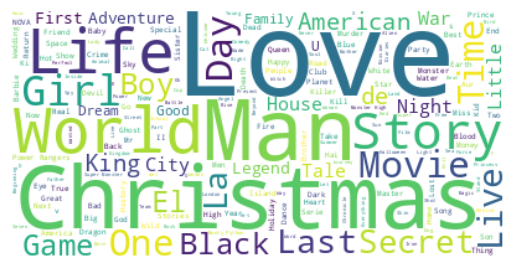

cluster 1


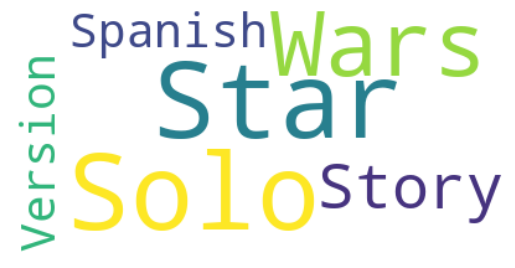

cluster 2


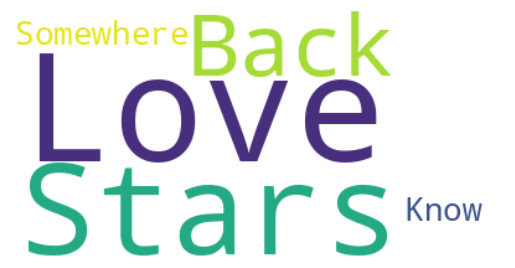

cluster 3


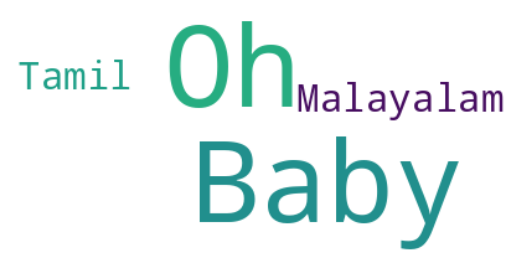

cluster 4


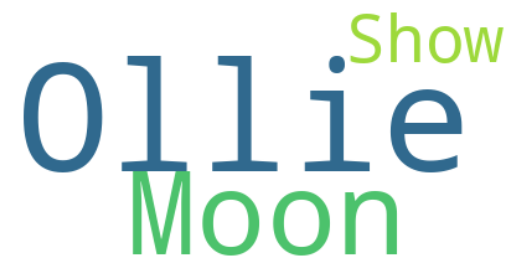

cluster 5


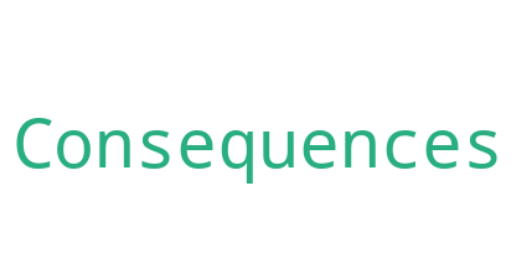

cluster 6


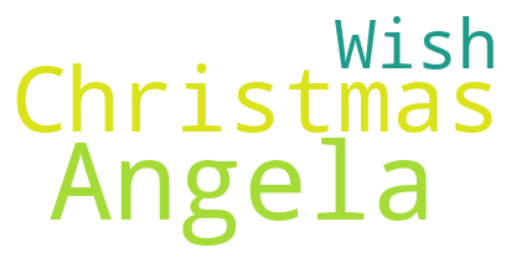

In [68]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_wordcloud(i,'title')

##### Word Cloud on "description" column for different cluster

cluster 0


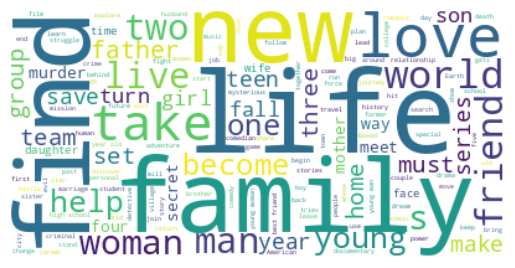

cluster 1


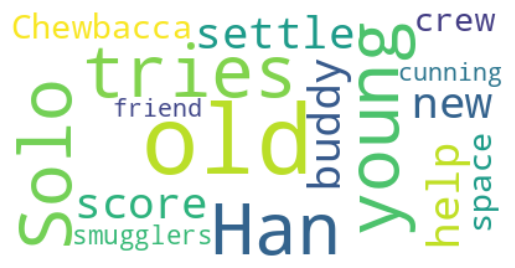

cluster 2


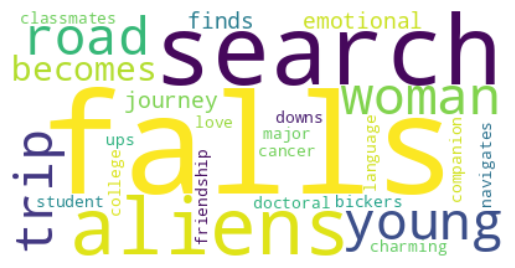

cluster 3


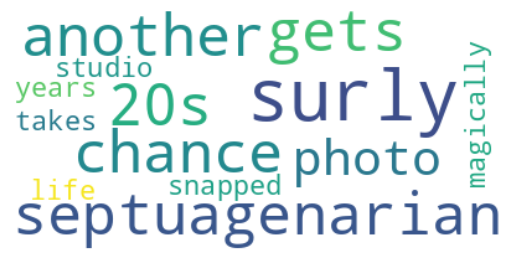

cluster 4


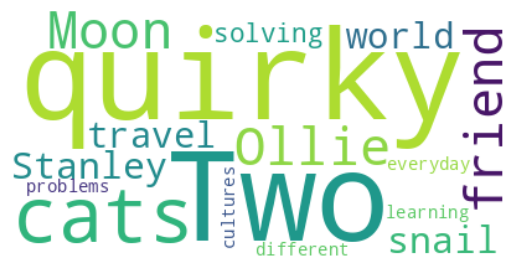

cluster 5


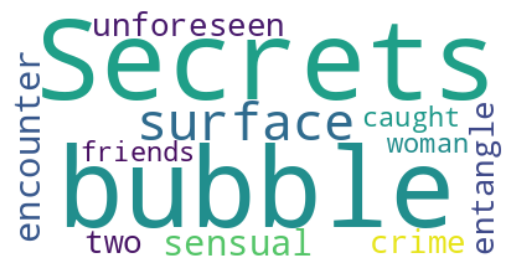

cluster 6


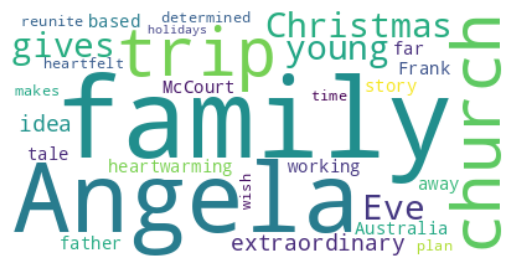

In [69]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_wordcloud(i,'description')

##### Word Cloud on "cast" column for different cluster

cluster 0


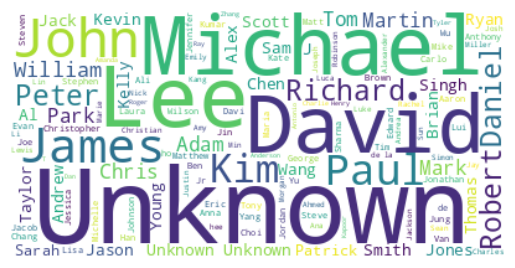

cluster 1


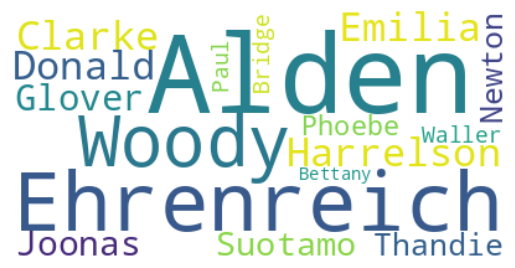

cluster 2


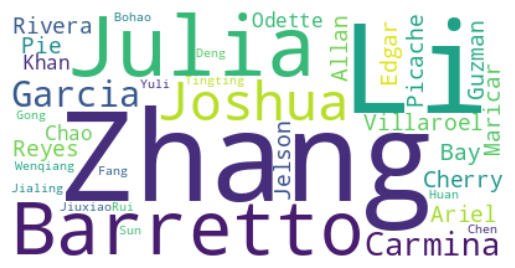

cluster 3


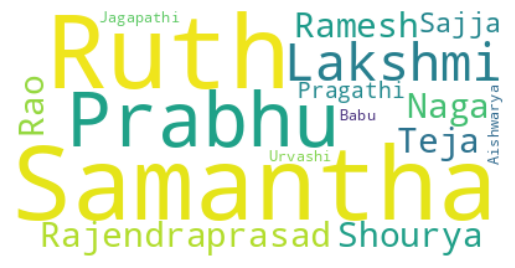

cluster 4


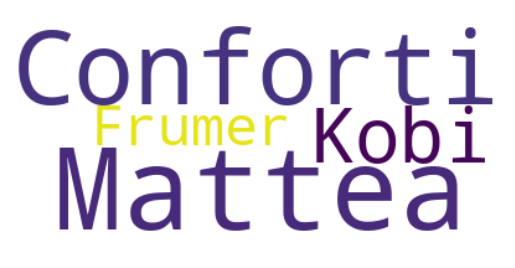

cluster 5


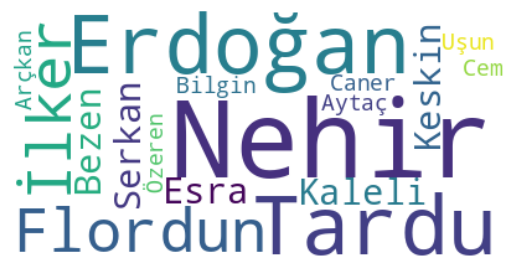

cluster 6


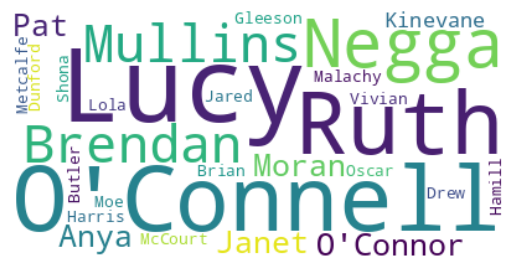

In [70]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_wordcloud(i,'cast')

##### Word Cloud on "country" column for different cluster

cluster 0


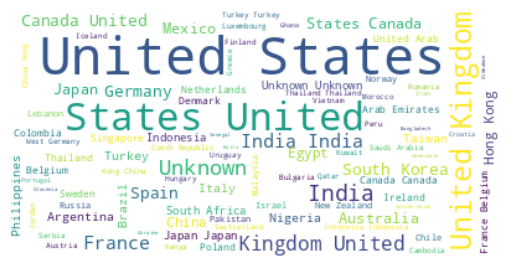

cluster 1


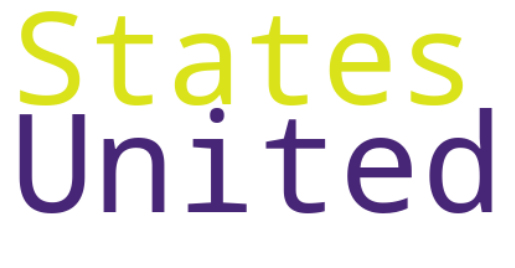

cluster 2


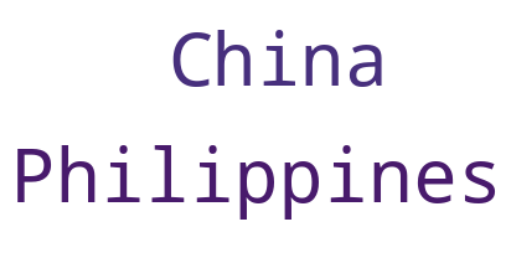

In [71]:
for i in range(3):
  print(f'cluster {i}')
  hierarchical_wordcloud(i,'country')

##### Word Cloud on "listed_in (genre)" column for different cluster

cluster 0


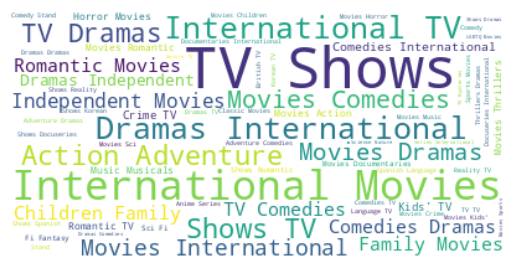

cluster 1


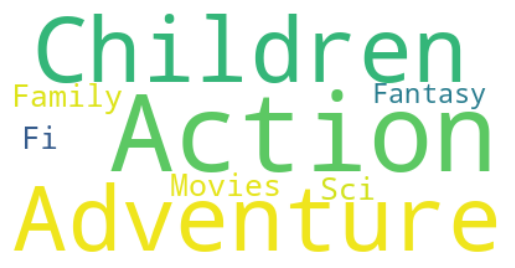

cluster 2


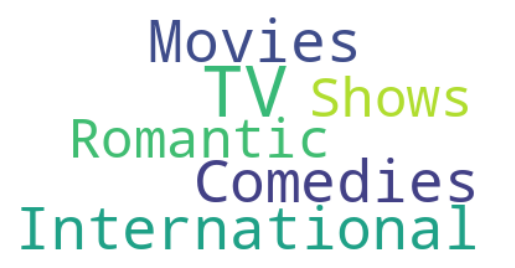

cluster 3


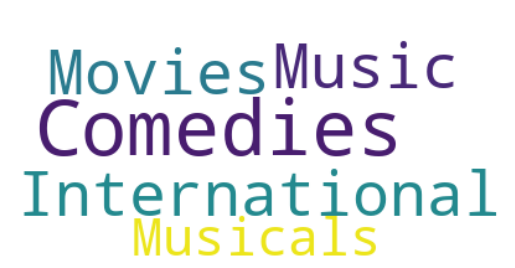

cluster 4


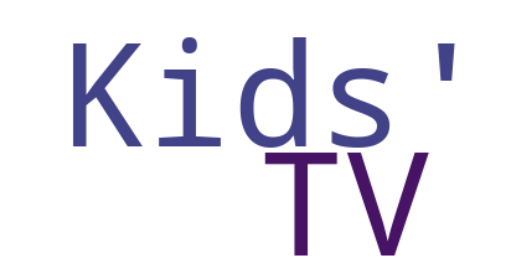

cluster 5


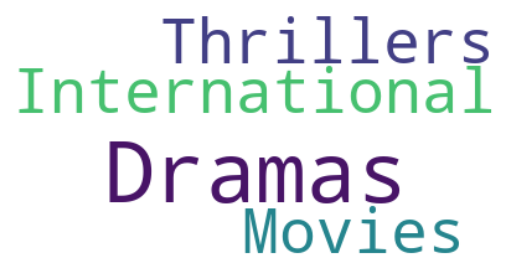

cluster 6


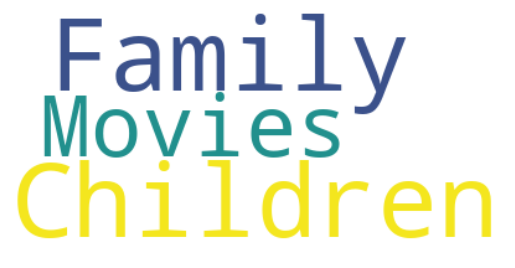

In [72]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_wordcloud(i,'listed_in')

## **10. Content Based Recommendation System**

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.

- We can build a simple content based recommender system based on the similarity of the movie/shows.
- If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
- To get the similarity score of the shows, we can use cosine similarity.
- The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the cosine similarity score of two vectors increases as the angle between them decreases.

In [75]:
# Verify index
data[['title', 'tags']]

title  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783                                   Zubaan   
7784                        Zulu Man in Japan   
7785                    Zumbo's Just Desserts   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futurelitinhabitislandparadisfarcrowdslumgeton...  
1     devastearthquakhitmexicocititrapsurvivorwalkli...  
2     armirecruitfounddeadfellowsoldierforcconfrontt...  
3     postapocalyptworldragdolrobothidefeardangermac...  
4     brilliantgroupstudentbecomcardcountexpertinten...  
...                                                 ...  
7782  lebanoncivilwardeprivzozofamilileftgrieflittlm...  
7783  scrappipoorboywormwaytycoondysfunctfamilifacef...  
7784  documentarisouthafricanrappernastichitstagestr...  
7785  dessertwizardadrianozumbolooknext“williwonka”t...  
7786  documentaridelvmystiqubehindbluesrocktrioexplo...  

[7787 rows x 2 columns]

- In order to build content based recommendation system, we find out similarity score on the basis of specific "index_id" with respect to that specific "tags" column.

- If we cannot reset the index there is highly chances that we calculate cosine similarity for another one index instead of that we provide index. In order to avoid this problem and address index properly while building recommandation system. We simply reset the index.

In [76]:
# Define new dataframe for building recommandation system
recomender_df = data.copy()

# Reset index
recomender_df.reset_index(inplace = True)

# Check whether or not reset index properly
recomender_df[['title', 'tags']]

title  \
0                                          3%   
1                                        7:19   
2                                       23:59   
3                                           9   
4                                          21   
...                                       ...   
7782                                     Zozo   
7783                                   Zubaan   
7784                        Zulu Man in Japan   
7785                    Zumbo's Just Desserts   
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futurelitinhabitislandparadisfarcrowdslumgeton...  
1     devastearthquakhitmexicocititrapsurvivorwalkli...  
2     armirecruitfounddeadfellowsoldierforcconfrontt...  
3     postapocalyptworldragdolrobothidefeardangermac...  
4     brilliantgroupstudentbecomcardcountexpertinten...  
...                                                 ...  
7782  lebanoncivilwardeprivzozofamilileftgrieflittlm...  
7783  scrappipoorboywormwaytycoondysfunctfamilifacef...  
7784  documentarisouthafricanrappernastichitstagestr...  
7785  dessertwizardadrianozumbolooknext“williwonka”t...  
7786  documentaridelvmystiqubehindbluesrocktrioexplo...  

[7787 rows x 2 columns]

- As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [80]:
# Drop index column
recomender_df.drop(columns=['index'], inplace=True)

In [82]:
# Call out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction
X

array([[-1.19079002e-04, -9.08339498e-04, -5.28032063e-04, ...,
         1.99929129e-02, -6.11557769e-03,  1.18996009e-03],
       [ 1.10545038e-03, -4.54087891e-04, -6.28479679e-04, ...,
         7.02227318e-03, -4.41451983e-03,  7.78879894e-04],
       [-6.73166190e-04,  7.15819099e-04,  5.82544544e-04, ...,
         7.62929069e-03,  3.28578500e-03,  8.24043067e-03],
       ...,
       [ 2.65080686e-04, -3.12175949e-04, -6.18068791e-05, ...,
        -1.53032013e-03, -3.68407048e-04, -5.54233557e-03],
       [ 7.71265596e-04, -8.26829648e-05,  1.03445404e-03, ...,
        -1.37479196e-02,  1.15424789e-02,  8.51795886e-03],
       [ 2.47164633e-04, -2.28461295e-04, -2.09905631e-04, ...,
         1.00768440e-02,  9.89053278e-03,  1.18793358e-03]])

In [83]:
# Calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.00000000e+00, -7.61887592e-03,  1.62304766e-02, ...,
         9.45728288e-03, -3.76139404e-03, -1.24901368e-03],
       [-7.61887592e-03,  1.00000000e+00, -1.16234643e-02, ...,
        -1.09155935e-02, -2.06874008e-02,  1.45716653e-02],
       [ 1.62304766e-02, -1.16234643e-02,  1.00000000e+00, ...,
        -1.38233399e-02, -2.83257476e-02,  1.68842421e-02],
       ...,
       [ 9.45728288e-03, -1.09155935e-02, -1.38233399e-02, ...,
         1.00000000e+00, -1.21732984e-02,  3.73320461e-02],
       [-3.76139404e-03, -2.06874008e-02, -2.83257476e-02, ...,
        -1.21732984e-02,  1.00000000e+00,  6.54889942e-04],
       [-1.24901368e-03,  1.45716653e-02,  1.68842421e-02, ...,
         3.73320461e-02,  6.54889942e-04,  1.00000000e+00]])

### Function to list down top 10 recommended movies based on the cosine similarity score

In [84]:
def recommend(movie):
  '''This function list down top ten movies on the basis of similarity score for that perticular movie.'''
  print(f"If you liked '{movie}', you may also enjoy: \n")
  # Find out index position
  index = recomender_df[recomender_df['title'] == movie].index[0]
  # Sort on the basis of simliarity score, in order to find out distaces from recommended one
  distances = sorted(list(enumerate(similarity[index])),reverse = True , key = lambda x:x[1])
  # List top ten recommenaded movie
  for i in distances[1:11]:
        print(data.iloc[i[0]].title)

In [85]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 

Strike a Pose
The Queen and the Conqueror
The Holiday Movies That Made Us
Thor: Tales of Asgard
The Unknown Known
Chelsea Handler: Uganda Be Kidding Me Live
Frank & Lola
Santo Cachón
Lady in the Water
Natural Born Pranksters


In [86]:
recommend('Our Planet')

If you liked 'Our Planet', you may also enjoy: 

Abdo Mota
Inhuman Resources
Riphagen - The Untouchable
Pete Davidson: Alive From New York
Star Trek: The Next Generation
We Have Always Lived in the Castle
Twinsanity
Mr. Woodcock
The Dirt
Monster High: Why Do Ghouls Fall in Love?


In [87]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Meet the Trumps: From Immigrant to President
Lifechanger
The Son
Ladies Up
Teenage Mutant Ninja Turtles: The Movie
Blockbuster
Counterpunch
Berlin Kaplani
El Marginal
Neo Yokio


# **Conclusion**

We had to categorize or group the Netflix movies/shows into specific clusters in order to solve a text clustering problem for this project. The movies/shows in one cluster had to be similar to one another, while the movies/shows in other clusters had to be different.
- There were approximately 7787 records and 11 attributes in the collection.
We started by performing exploratory data analysis (EDA) and addressing the dataset's missing values.
- More movies than TV series are available on Netflix, and the quantity of new episodes being added to the service is increasing rapidly. Additionally, the vast bulk of the shows were created in the US.
The data was grouped according to the following criteria: director, cast, nation, genre, rating, and description. After preprocessing and tokenization, the TFIDF vectorizer was used to vectorize the values in these attributes.
A total of 10,000 characteristics were produced using **TFIDF Vectorization**.
- To address the curse of dimensionality**, we employed **Principal Component Analysis (PCA). The number of components was limited to 3000 since **3000 components were able to capture more than 80% of variance**.
- The **optimal number of clusters** was determined to be 5** after we initially constructed clusters using the **K-Means Clustering** technique. The **elbow technique and Silhouette score** analysis were used to get this.
- After that, clusters were created using the **Agglomerative clustering** technique, and seven was determined to be the **optimal number of clusters**. The **dendrogram** was visualized in order to acquire this.
- The similarity matrix that was produced after applying **cosine similarity** was used to construct a **content based recommender system**. The customer will receive ten recommendations from this recommender system depending on the kind of show they have viewed.